In [1]:
# importing packages and modules
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.optimize import minimize
from utils import *
from plotting_utils import *
from analysis_utils import *
import dglm_hmm2
import dglm_hmm1
from scipy.stats import multivariate_normal, norm
# import jax

sns.set_context("talk")

In [2]:
# setting hyperparameters
S = 20 # sessions
T = 25000 # trials per session
N = T * S # total data points
C = 2 # classes
K = 2 # states
D = 2 # features (sensory & bias)

Session indicies
[0, 25000, 50000, 75000, 100000, 125000, 150000, 175000, 200000, 225000, 250000, 275000, 300000, 325000, 350000, 375000, 400000, 425000, 450000, 475000, 500000]
(500000, 2, 2, 2)


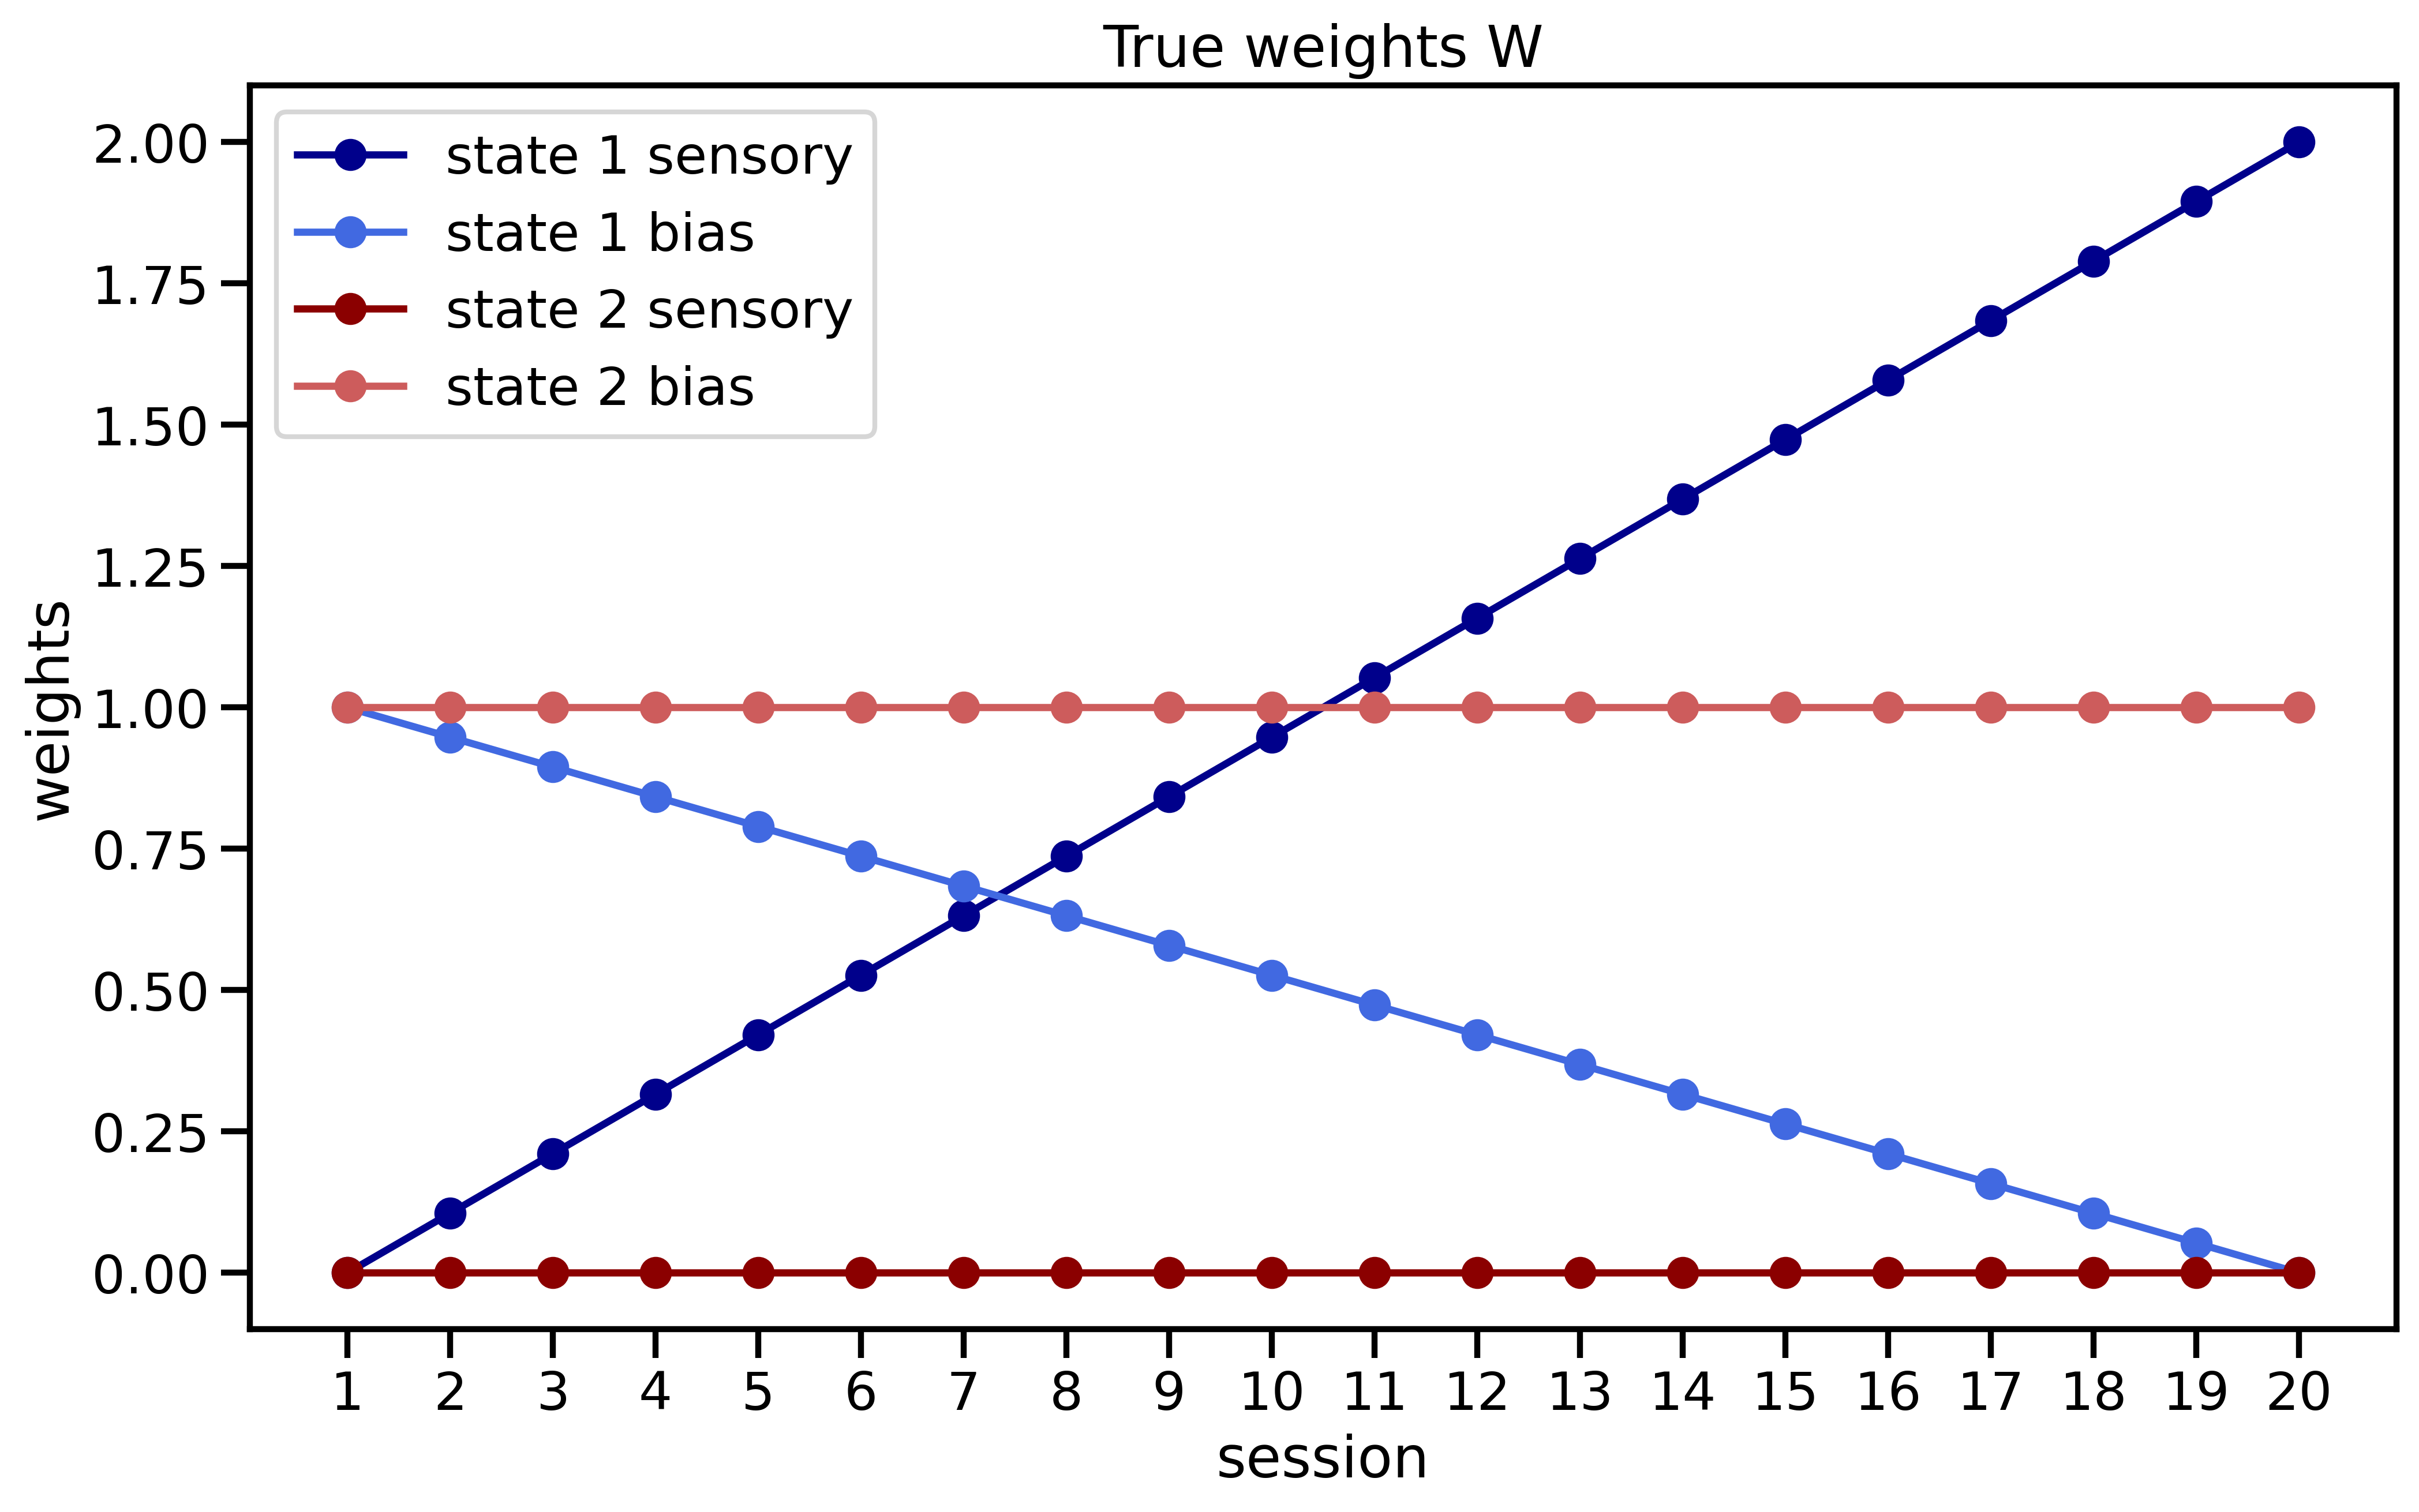

In [3]:
# True Weights and Session Start Indices
ourW = np.zeros((S,K,D))
ourW[:,0,1] = np.linspace(0,2,S) # state 1 sensory (increasing)
ourW[:,0,0] = np.linspace(1,0,S) # state 1 bias (decreasing)
ourW[:,1,1] = 0 # state 2 sensory (flat 0)
ourW[:,1,0] = 1 # state 2 bias (flat 1)
trueW = np.zeros((N,K,D,C))
# change weight format to have session*trials points
sessInd = []
for sess in range(0,S):
    sessInd.append(sess*T)
    for t in range(0,T):
        trueW[sess*T+t,:,:,1] = ourW[sess,:,:]
sessInd.append(N)
print("Session indicies")
print(sessInd)

testSessInd = []
for sess in range(0,S+1):
    testSessInd.append(sess*T)

print(trueW.shape)
fig, axes = plt.subplots(1, figsize = (12,7), dpi=400)
plotting_weights(w=trueW, sessInd=sessInd, axes=axes, trueW=None, title='True weights W', save_fig=False)

### Transition matrix is constant across sessions:

In [8]:
# True Transition Matrix
ourP = np.zeros((2,2))
ourP[0,0]=0.97
ourP[0,1]=0.03
ourP[1,0]=.05
ourP[1,1]=.95
print("True Transition Matrix P")
print(ourP)

trueP = np.zeros((N,K,K))
for sess in range(0,S):
    for t in range(0,T):
        trueP[sess*T+t] = ourP

True Transition Matrix P
[[0.97 0.03]
 [0.05 0.95]]


In [13]:
dGLMHMM1 = dglm_hmm1.dGLM_HMM1(N,K,D,C)
dGLMHMM = dglm_hmm2.dGLM_HMM2(N,K,D,C)
# _, _, _ = dGLMHMM.simulate_data(trueW, trueP, sessInd, save=True, title=f'N={N}_{K}_state_constantP_train', pi0=0.5)
trainX = np.load(f'../data/N={N}_2_state_constantP_trainX.npy')
trainY = np.load(f'../data/N={N}_2_state_constantP_trainY.npy')
testX = np.load(f'../data/N={N}_2_state_constantP_testX.npy') 
testY = np.load(f'../data/N={N}_2_state_constantP_testY.npy') 
testSessInd = []
for sess in range(0,S+1):
    testSessInd.append(sess*T)



In [11]:
oneSessInd = [0,N]
initP0, initW0 = dGLMHMM1.generate_param(sessInd=oneSessInd, transitionDistribution=['dirichlet', (5, 1)], weightDistribution=['uniform', (-2,2)]) # initial random param
initP,  initW, _ = dGLMHMM1.fit(trainX, trainY,  initP0, initW0, sigma=reshapeSigma(1, K, D), sessInd=oneSessInd, pi0=None, maxIter=300, tol=1e-4) # GLM-HMM param # sigma does not matter
checkP0,  checkW0, _ = dGLMHMM1.fit(trainX, trainY,  initP, initW, sigma=reshapeSigma(0.2, K, D), sessInd=sessInd, pi0=None, maxIter=300, tol=1e-4) # dGLM-HMM1 
checkP, checkW, checkLl = dGLMHMM.fit(trainX, trainY,  initP=reshapeP_M1_to_M2(checkP0, N), initW=checkW0, sigma=reshapeSigma(0.2, K, D), alpha=1, globalP=checkP0, sessInd=sessInd, pi0=None, maxIter=600, tol=1e-3) # fit the model
# checkP, checkW, checkLl = dGLMHMM.fit(trainX, trainY,  initP=reshapeP_M1_to_M2(initP, N), initW=initW, sigma=reshapeSigma(0.2, K, D), sessInd=sessInd, pi0=None, maxIter=600, tol=1e-3) # fit the model

# 7-11 minutes with L-BFGS-S; 48 min for T=5000
# 24 minutes with BFGS


0
10
20
30
0
10
20
30
40
50
60
0
Sessions 9 Zeta  3108.8567539247388
Sessions 9 Zeta  87.84279065418434
Sessions 9 Zeta  88.68266683488332
Sessions 9 Zeta  1713.6177885861907
Sessions 8 Zeta  3150.9441145193705
Sessions 8 Zeta  84.07162874880021
Sessions 8 Zeta  84.34904888974398
Sessions 8 Zeta  1679.6352078420723
Sessions 7 Zeta  3057.1403735464287
Sessions 7 Zeta  82.85305742034839
Sessions 7 Zeta  83.68479004202966
Sessions 7 Zeta  1775.3217789912153
Sessions 6 Zeta  3122.4124975029963
Sessions 6 Zeta  86.82982376072565
Sessions 6 Zeta  87.62052778093592
Sessions 6 Zeta  1702.1371509553655
Sessions 5 Zeta  3075.4555620692936
Sessions 5 Zeta  83.84274701005431
Sessions 5 Zeta  83.9949073787414
Sessions 5 Zeta  1755.706783541875
Sessions 4 Zeta  3144.809511300027
Sessions 4 Zeta  83.23695861088542
Sessions 4 Zeta  83.67934795606281
Sessions 4 Zeta  1687.27418213303
Sessions 3 Zeta  3063.384812688155
Sessions 3 Zeta  86.30021379280069
Sessions 3 Zeta  86.17384140832269
Sessions 3 Zeta

In [13]:
print("Global P used for Dirichlet Prior and found by fitting dGLM-HMM version 1")
print(checkP0)

Global P used for Dirichlet Prior and found by fitting dGLM-HMM version 1
[[0.97335596 0.02664404]
 [0.04718289 0.95281711]]


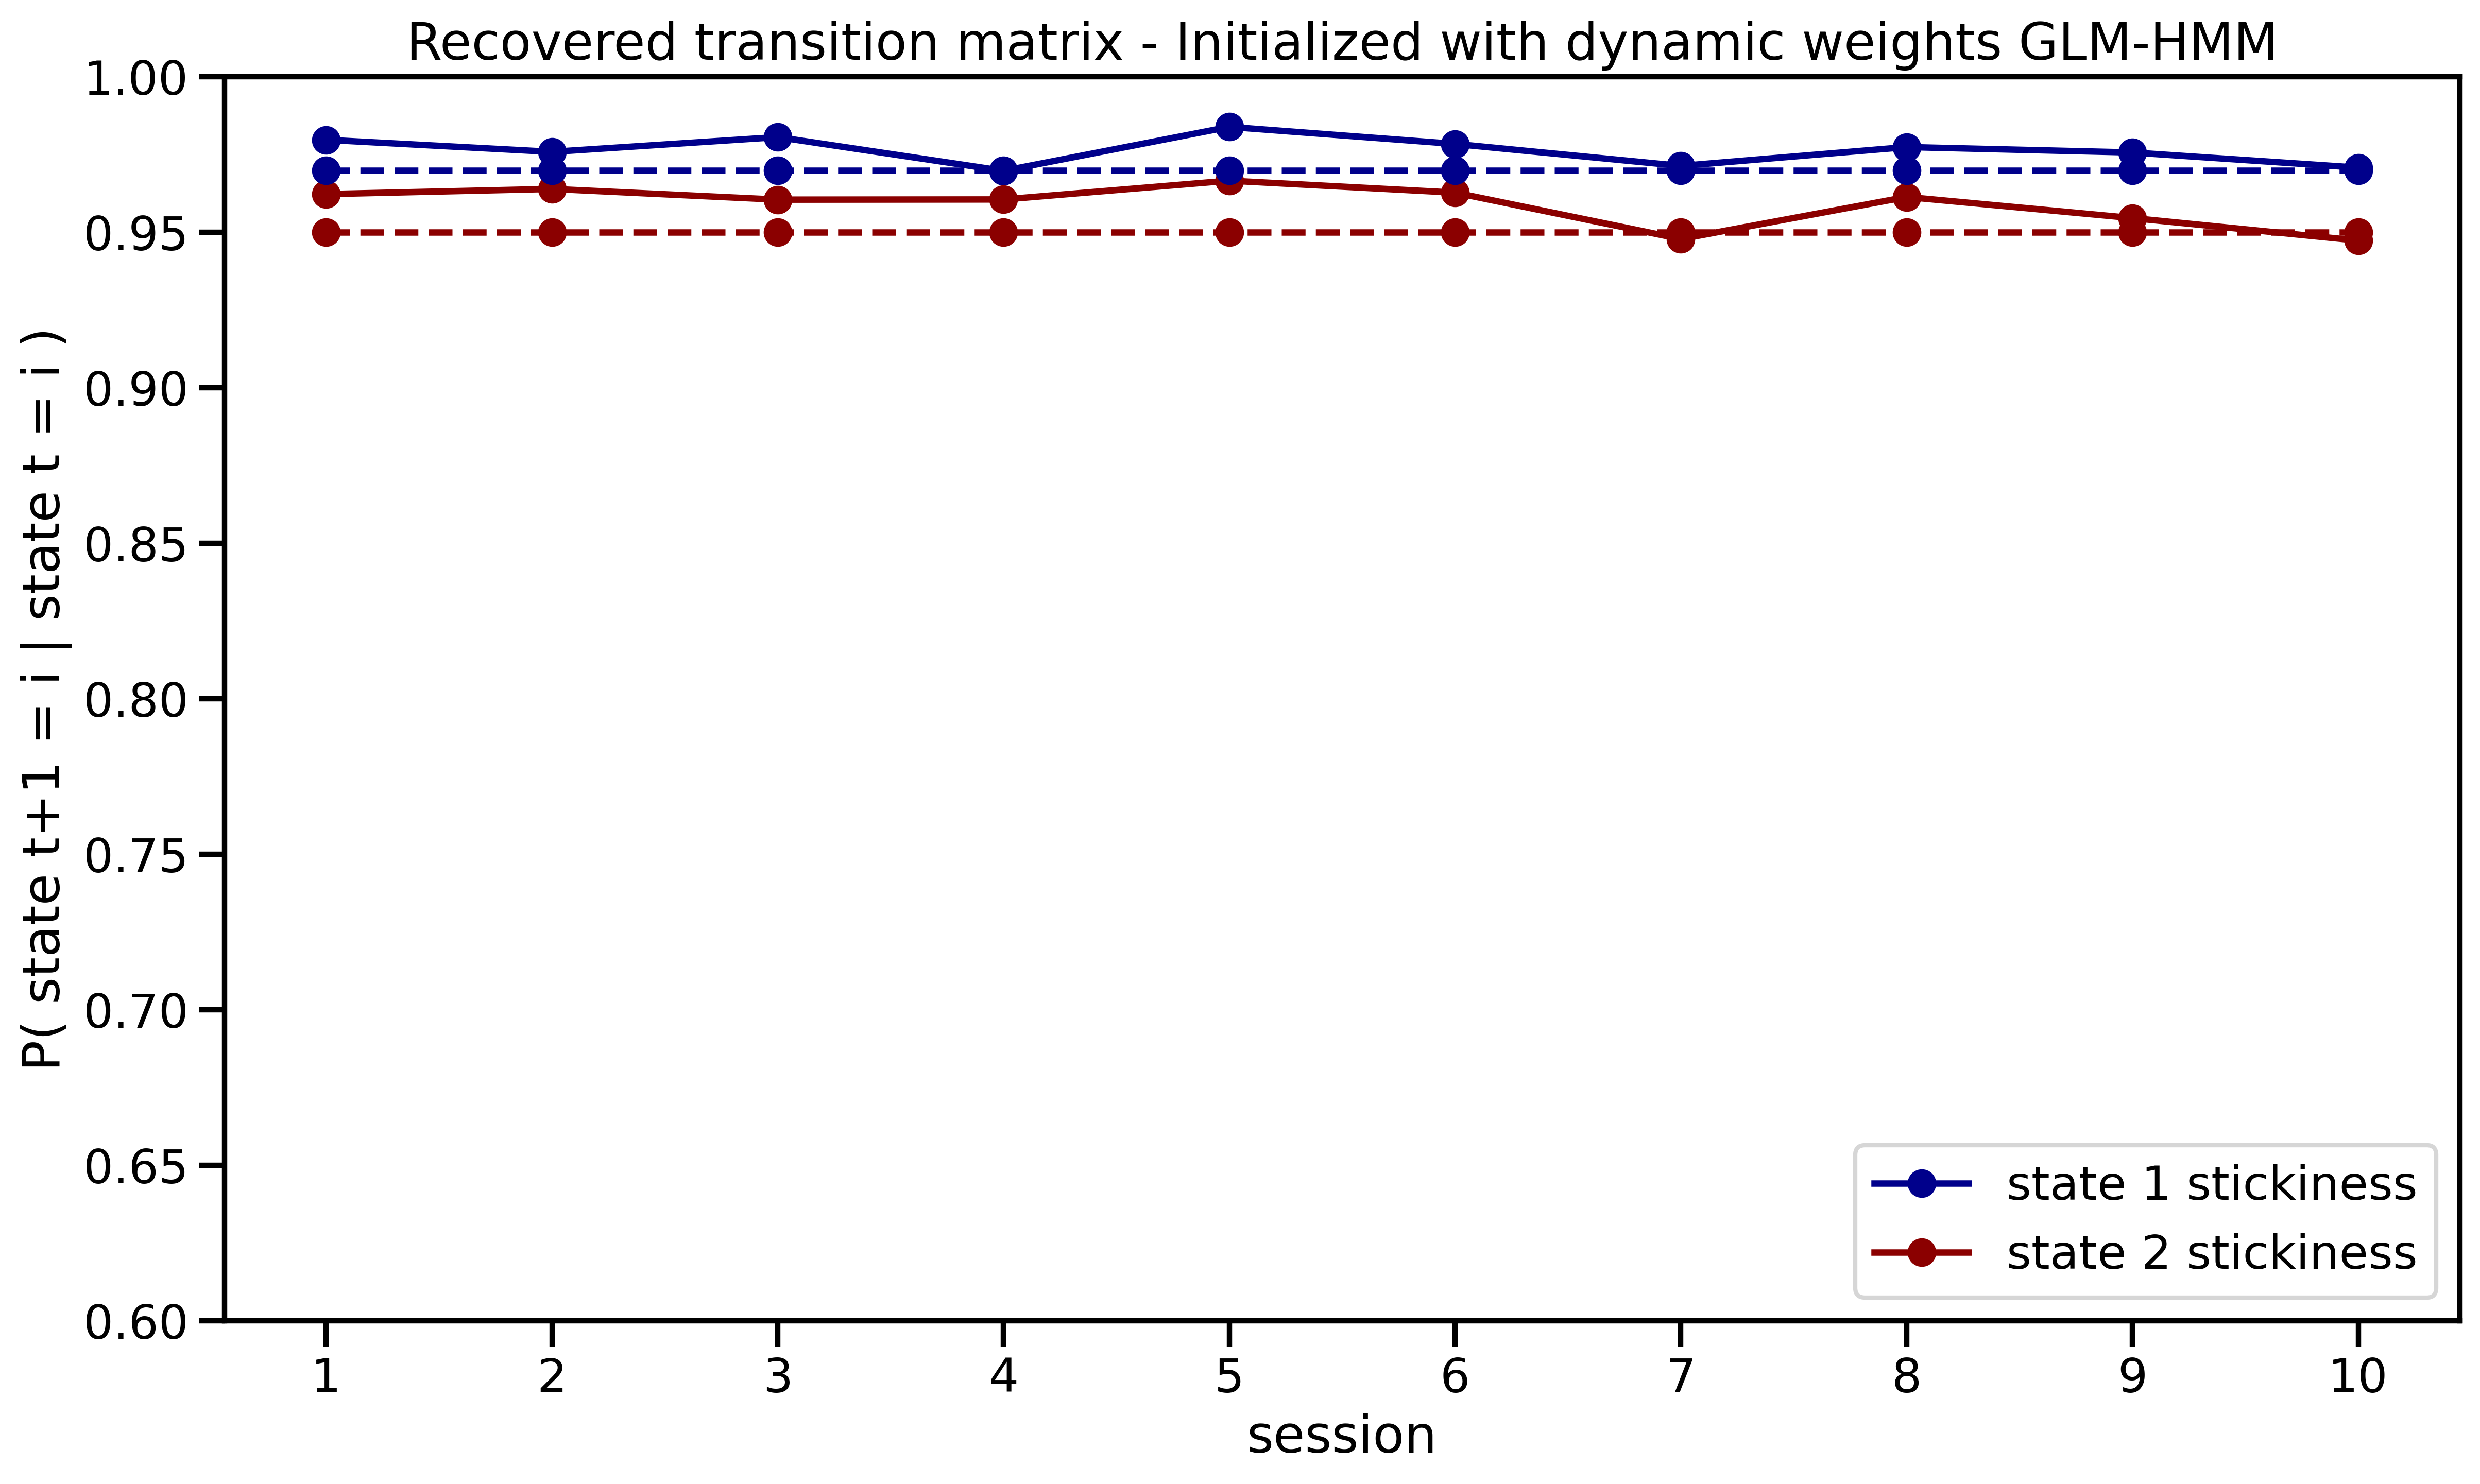

In [12]:
fig, axes = plt.subplots(1, figsize = (14,8), dpi=400)
plotting_transition_matrix_stickiness(checkP, sessInd, axes, trueP=trueP, title='Recovered transition matrix - Initialized with dynamic weights GLM-HMM', save_fig=False)

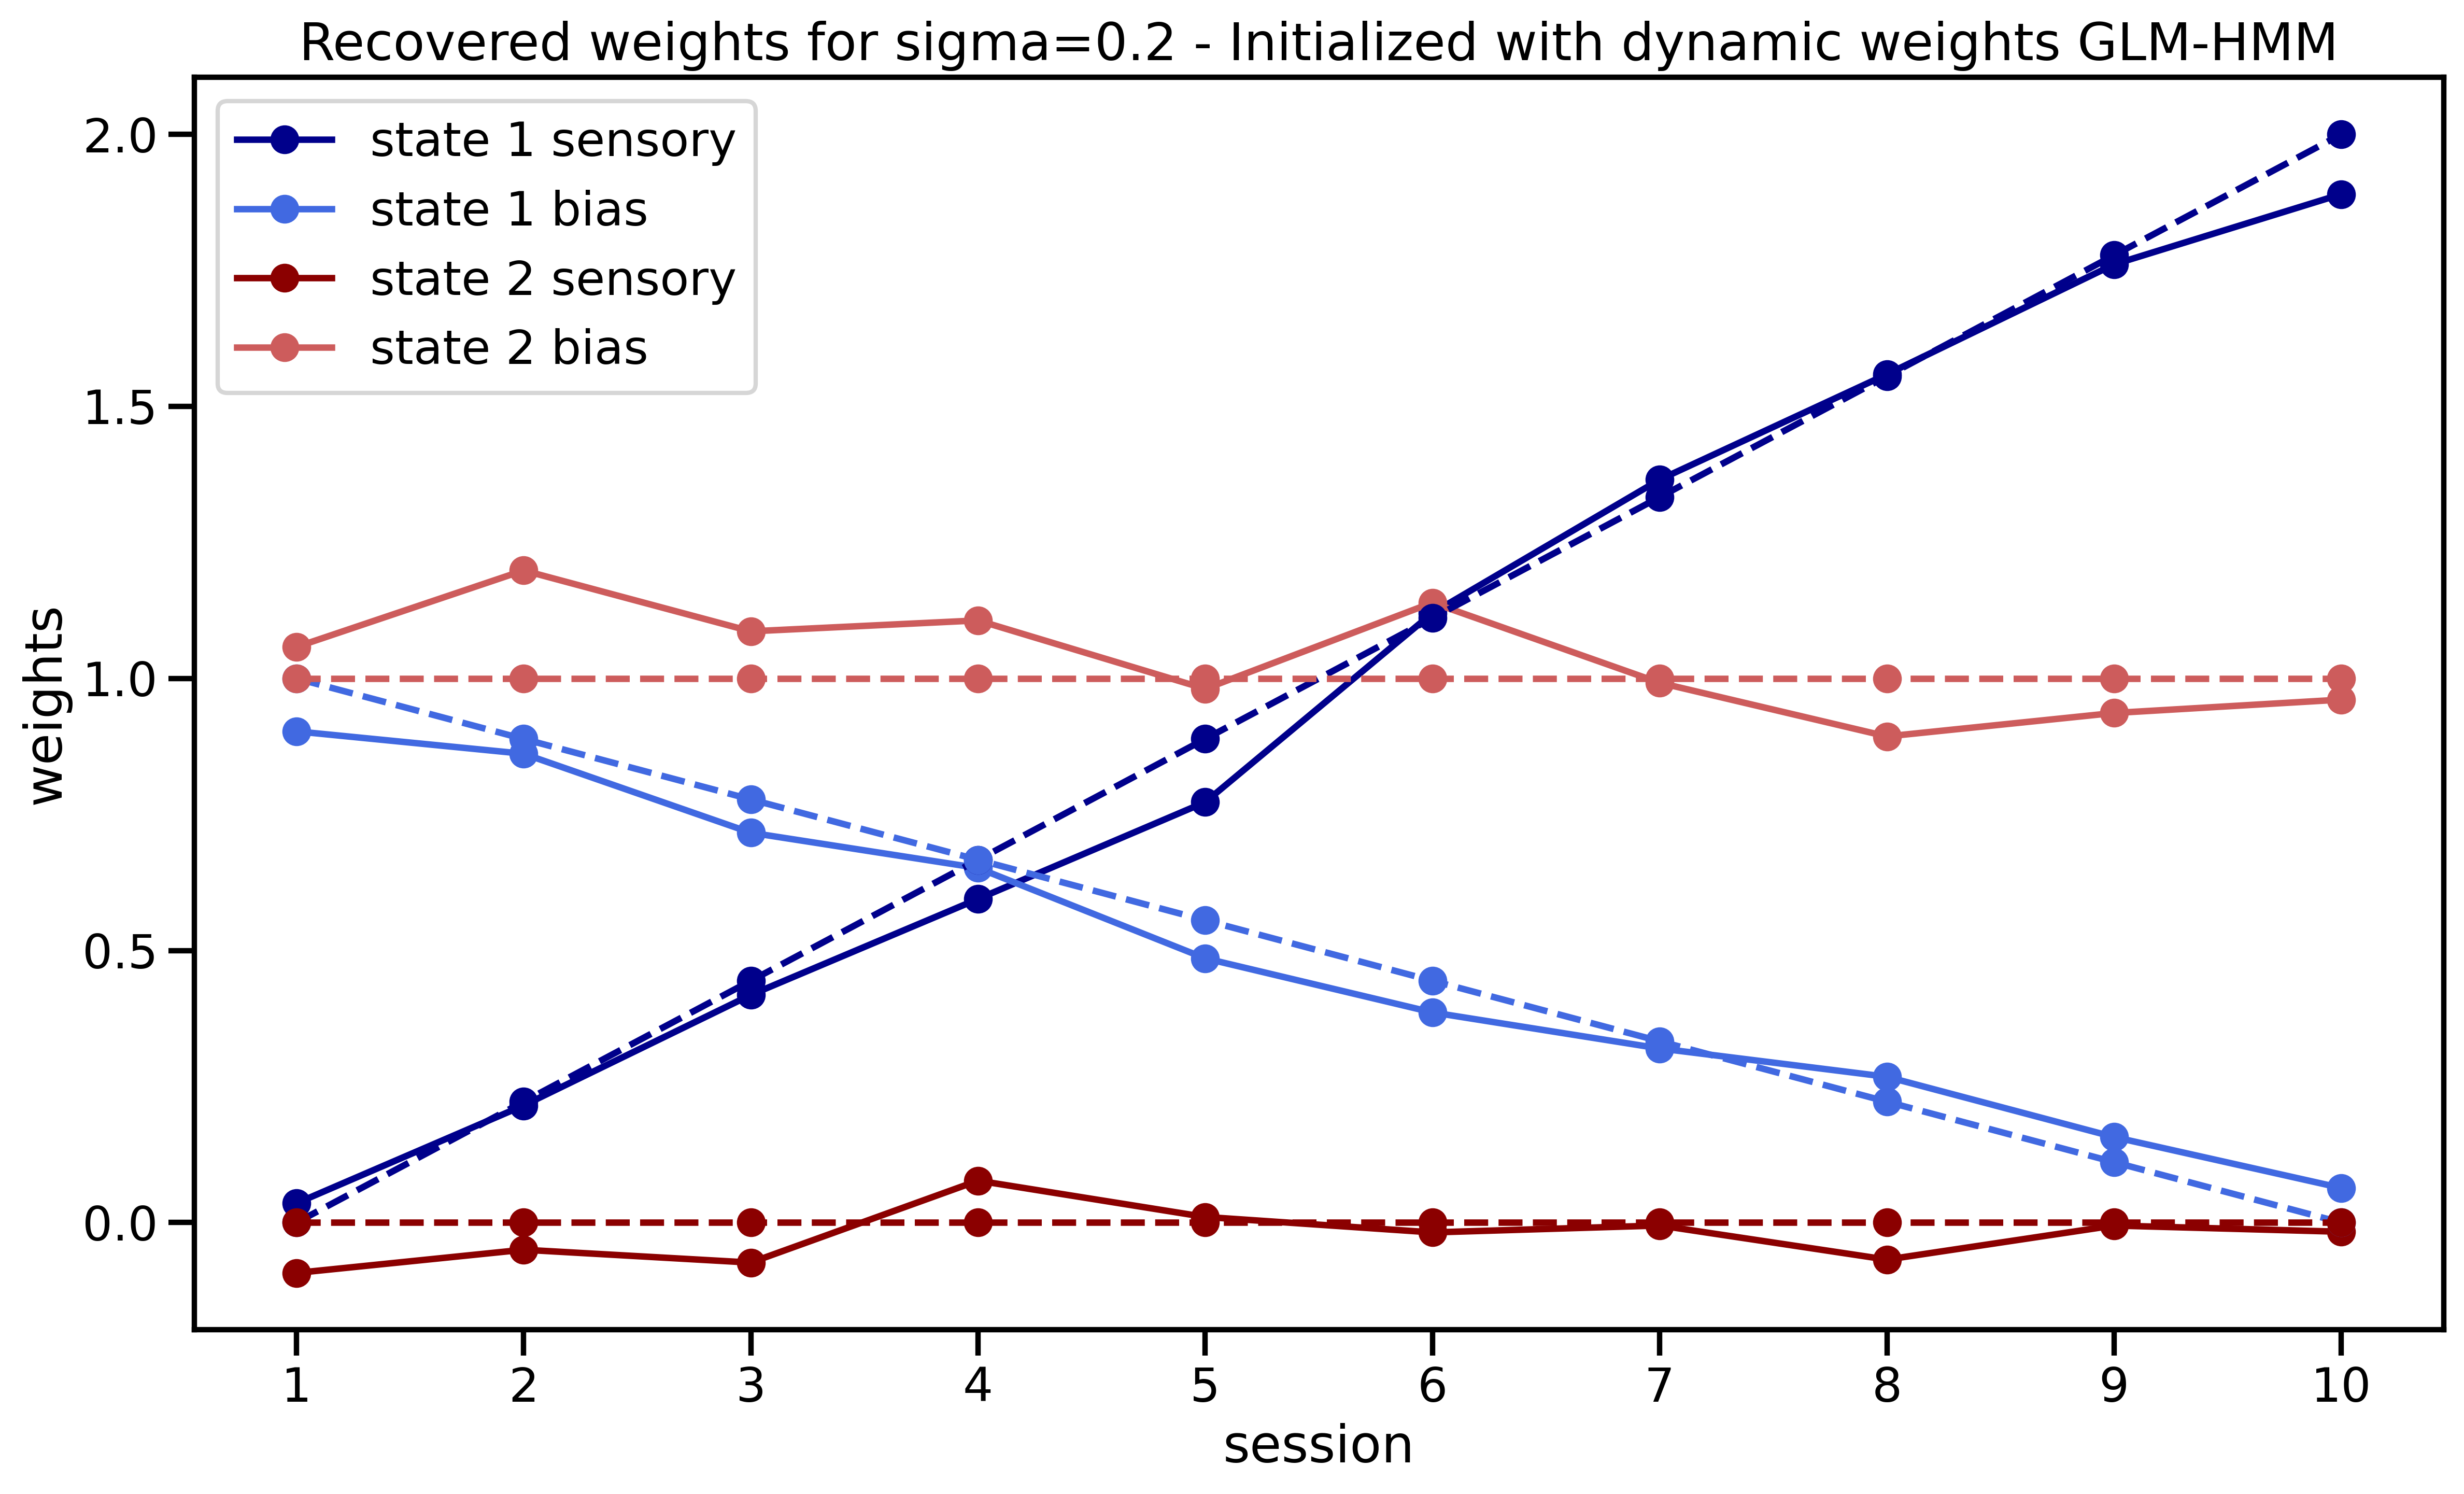

In [14]:
# fig, axes = plt.subplots(1, figsize = (14,8), dpi=400)
# plotting_weights(checkW0, sessInd, axes=axes,  trueW=trueW, title=f'Recovered weights for sigma=0.2', save_fig=False)
fig, axes = plt.subplots(1, figsize = (14,8), dpi=400)
plotting_weights(checkW, sessInd, axes=axes,  trueW=trueW, title=f'Recovered weights for sigma=0.2 - Initialized with dynamic weights GLM-HMM', save_fig=False)

In [19]:
# Fitting for different values of alpha
alphaList = [4**x for x in list(np.arange(-1,6,0.5, dtype=float))]
maxiter=600
allLl = np.zeros((len(alphaList),maxiter))
allP = np.zeros((len(alphaList),N,K,K))
allW = np.zeros((len(alphaList),N,K,D,C))
testLl = np.zeros((len(alphaList)))

oneSessInd = [0,N] # treating whole dataset as one session for normal GLM-HMM fitting
initP0, initW0 = dGLMHMM1.generate_param(sessInd=oneSessInd, transitionDistribution=['dirichlet', (5, 1)], weightDistribution=['uniform', (-2,2)]) # initial random param
initP,  initW, _ = dGLMHMM1.fit(trainX, trainY,  initP0, initW0, sigma=reshapeSigma(1, K, D), sessInd=oneSessInd, pi0=None, maxIter=maxiter, tol=1e-4) # GLM-HMM param # sigma does not matter
checkP0,  checkW0, _ = dGLMHMM1.fit(trainX, trainY,  initP, initW, sigma=reshapeSigma(0.2, K, D), sessInd=sessInd, pi0=None, maxIter=maxiter, tol=1e-4) # dGLM-HMM1 
print("Global P")
print(checkP0)

for indAlpha in range(0,len(alphaList)): 
    print(f'indAlpha {indAlpha}')
    if (indAlpha == 0):
    # fit # init reshapeP_M1_to_M2(checkP0, N)
        allP[indAlpha],allW[indAlpha], allLl[indAlpha] = dGLMHMM.fit(trainX, trainY,  initP=reshapeP_M1_to_M2(checkP0, N), initW=checkW0, sigma=reshapeSigma(0.2, K, D), alpha=alphaList[indAlpha], globalP=ourP, sessInd=sessInd, pi0=None, maxIter=maxiter, tol=1e-3) # fit the model
    else:
        allP[indAlpha],allW[indAlpha], allLl[indAlpha] = dGLMHMM.fit(trainX, trainY,  initP=allP[indAlpha-1], initW=allW[indAlpha-1], sigma=reshapeSigma(0.2, K, D), alpha=alphaList[indAlpha], globalP=ourP, sessInd=sessInd, pi0=None, maxIter=maxiter, tol=1e-3) # fit the model
    
   # evaluate
    testPhi = dGLMHMM.observation_probability(testX, reshapeWeights(allW[indAlpha], sessInd, testSessInd))
    for s in range(0, S):
        _, _, temp = dGLMHMM.forward_pass(testY[testSessInd[s]:testSessInd[s+1]],allP[indAlpha],testPhi[testSessInd[s]:testSessInd[s+1]])
        testLl[indAlpha] += temp
   
testLl = testLl / testSessInd[-1] # normalizing to the total number of trials in test
    
np.save(f'../data/Ll_N={N}_{K}_state_constantP_trueGlobal', allLl)
np.save(f'../data/P_N={N}_{K}_state_constantP_trueGlobal', allP)
np.save(f'../data/W_N={N}_{K}_state_constantP_trueGlobal', allW)
np.save(f'../data/testLl_N={N}_{K}_state_constantP_trueGlobal', testLl)

0
10
20
30
40
50
60
70
0
10
20
30
40
50
60
70
80
90
100
110
120
Global P
[[0.97039625 0.02960375]
 [0.0504109  0.9495891 ]]
indAlpha 0
0
10
20
30
40
50
60
70
80
indAlpha 1
0
10
indAlpha 2
0
10
indAlpha 3
0
10
indAlpha 4
0
10
indAlpha 5
0
10
indAlpha 6
0
10
indAlpha 7
0
10
indAlpha 8
0
10
indAlpha 9
0
10
indAlpha 10
0
10
indAlpha 11
0
10
indAlpha 12
0
10
indAlpha 13
0
10


In [26]:
print("Global P")
print(checkP0)
print(N)

Global P
[[0.97335596 0.02664404]
 [0.04718289 0.95281711]]
50000


In [15]:
# Fitting for different values of alpha
# alphaList = [4**x for x in list(np.arange(-3,2, dtype=float))] + [4**x for x in list(np.arange(2,5,0.5, dtype=float))] + [4**x for x in list(np.arange(5,9,1, dtype=float))]
alphaList = [4**x for x in [-3,-1,1,3,4,5,7,9]]
maxiter=600
allLl = np.zeros((len(alphaList),maxiter))
allP = np.zeros((len(alphaList),N,K,K))
allW = np.zeros((len(alphaList),N,K,D,C))
testLl = np.zeros((len(alphaList)))

# oneSessInd = [0,N] # treating whole dataset as one session for normal GLM-HMM fitting
# initP0, initW0 = dGLMHMM1.generate_param(sessInd=oneSessInd, transitionDistribution=['dirichlet', (5, 1)], weightDistribution=['uniform', (-2,2)]) # initial random param
# initP,  initW, _ = dGLMHMM1.fit(trainX, trainY,  initP0, initW0, sigma=reshapeSigma(1, K, D), sessInd=oneSessInd, pi0=None, maxIter=maxiter, tol=1e-4) # GLM-HMM param # sigma does not matter
# checkP0,  checkW0, _ = dGLMHMM1.fit(trainX, trainY,  initP, initW, sigma=reshapeSigma(0.2, K, D), sessInd=sessInd, pi0=None, maxIter=maxiter, tol=1e-4) # dGLM-HMM1 
    
for indAlpha in range(0,len(alphaList)): 
   print(f'indAlpha {indAlpha}')

   # fit
   allP[indAlpha],allW[indAlpha], allLl[indAlpha] = dGLMHMM.fit(trainX, trainY,  initP=reshapeP_M1_to_M2(checkP0, N), initW=checkW0, sigma=reshapeSigma(0.2, K, D), alpha=alphaList[indAlpha], globalP=checkP0, sessInd=sessInd, pi0=None, maxIter=maxiter, tol=1e-3) # fit the model
   
   # evaluate
   testPhi = dGLMHMM.observation_probability(testX, reshapeWeights(allW[indAlpha], sessInd, testSessInd))
   for s in range(0, S):
      _, _, temp = dGLMHMM.forward_pass(testY[testSessInd[s]:testSessInd[s+1]],allP[indAlpha],testPhi[testSessInd[s]:testSessInd[s+1]])
      testLl[indAlpha] += temp
   
testLl = testLl / testSessInd[-1] # normalizing to the total number of trials in test
    
# np.save(f'../data/Ll_N={N}_{K}_state_constantP', allLl)
# np.save(f'../data/P_N={N}_{K}_state_constantP', allP)
# np.save(f'../data/W_N={N}_{K}_state_constantP', allW)
# np.save(f'../data/testLl_N={N}_{K}_state_constantP', testLl)


indAlpha 0
0
Sessions 9 Zeta  3108.8567539247388
Sessions 9 Zeta  87.84279065418434
Sessions 9 Zeta  88.68266683488332
Sessions 9 Zeta  1713.6177885861907
Sessions 8 Zeta  3150.9441145193705
Sessions 8 Zeta  84.07162874880021
Sessions 8 Zeta  84.34904888974398
Sessions 8 Zeta  1679.6352078420723
Sessions 7 Zeta  3057.1403735464287
Sessions 7 Zeta  82.85305742034839
Sessions 7 Zeta  83.68479004202966
Sessions 7 Zeta  1775.3217789912153
Sessions 6 Zeta  3122.4124975029963
Sessions 6 Zeta  86.82982376072565
Sessions 6 Zeta  87.62052778093592
Sessions 6 Zeta  1702.1371509553655
Sessions 5 Zeta  3075.4555620692936
Sessions 5 Zeta  83.84274701005431
Sessions 5 Zeta  83.9949073787414
Sessions 5 Zeta  1755.706783541875
Sessions 4 Zeta  3144.809511300027
Sessions 4 Zeta  83.23695861088542
Sessions 4 Zeta  83.67934795606281
Sessions 4 Zeta  1687.27418213303
Sessions 3 Zeta  3063.384812688155
Sessions 3 Zeta  86.30021379280069
Sessions 3 Zeta  86.17384140832269
Sessions 3 Zeta  1763.141132110733


In [36]:
# oldW = np.load('../data/W_N=50000_2_state_constantP.npy')
# oldP = np.load('../data/P_N=50000_2_state_constantP.npy')
# oldLl = np.load('../data/testLl_N=50000_2_state_constantP.npy')
# alphaList = [4**x for x in list(np.arange(-3,2, dtype=float))] + [4**x for x in list(np.arange(2,4,0.25, dtype=float))] + [4**x for x in list(np.arange(4,8,1, dtype=float))]
# print(oldW.shape)

oldW = np.load('../data/W_N=50000_2_state_constantP_alphaV2.npy')
oldP = np.load('../data/P_N=50000_2_state_constantP_alphaV2.npy')
oldLl = np.load('../data/testLl_N=50000_2_state_constantP_alphaV2.npy')
alphaList = [4**x for x in [-3,-1,1,3,4,5,7,9]]
print(oldW.shape)

(8, 50000, 2, 2, 2)


Text(0.5, 1.0, 'Model performance as a function of hyperparameter alpha')

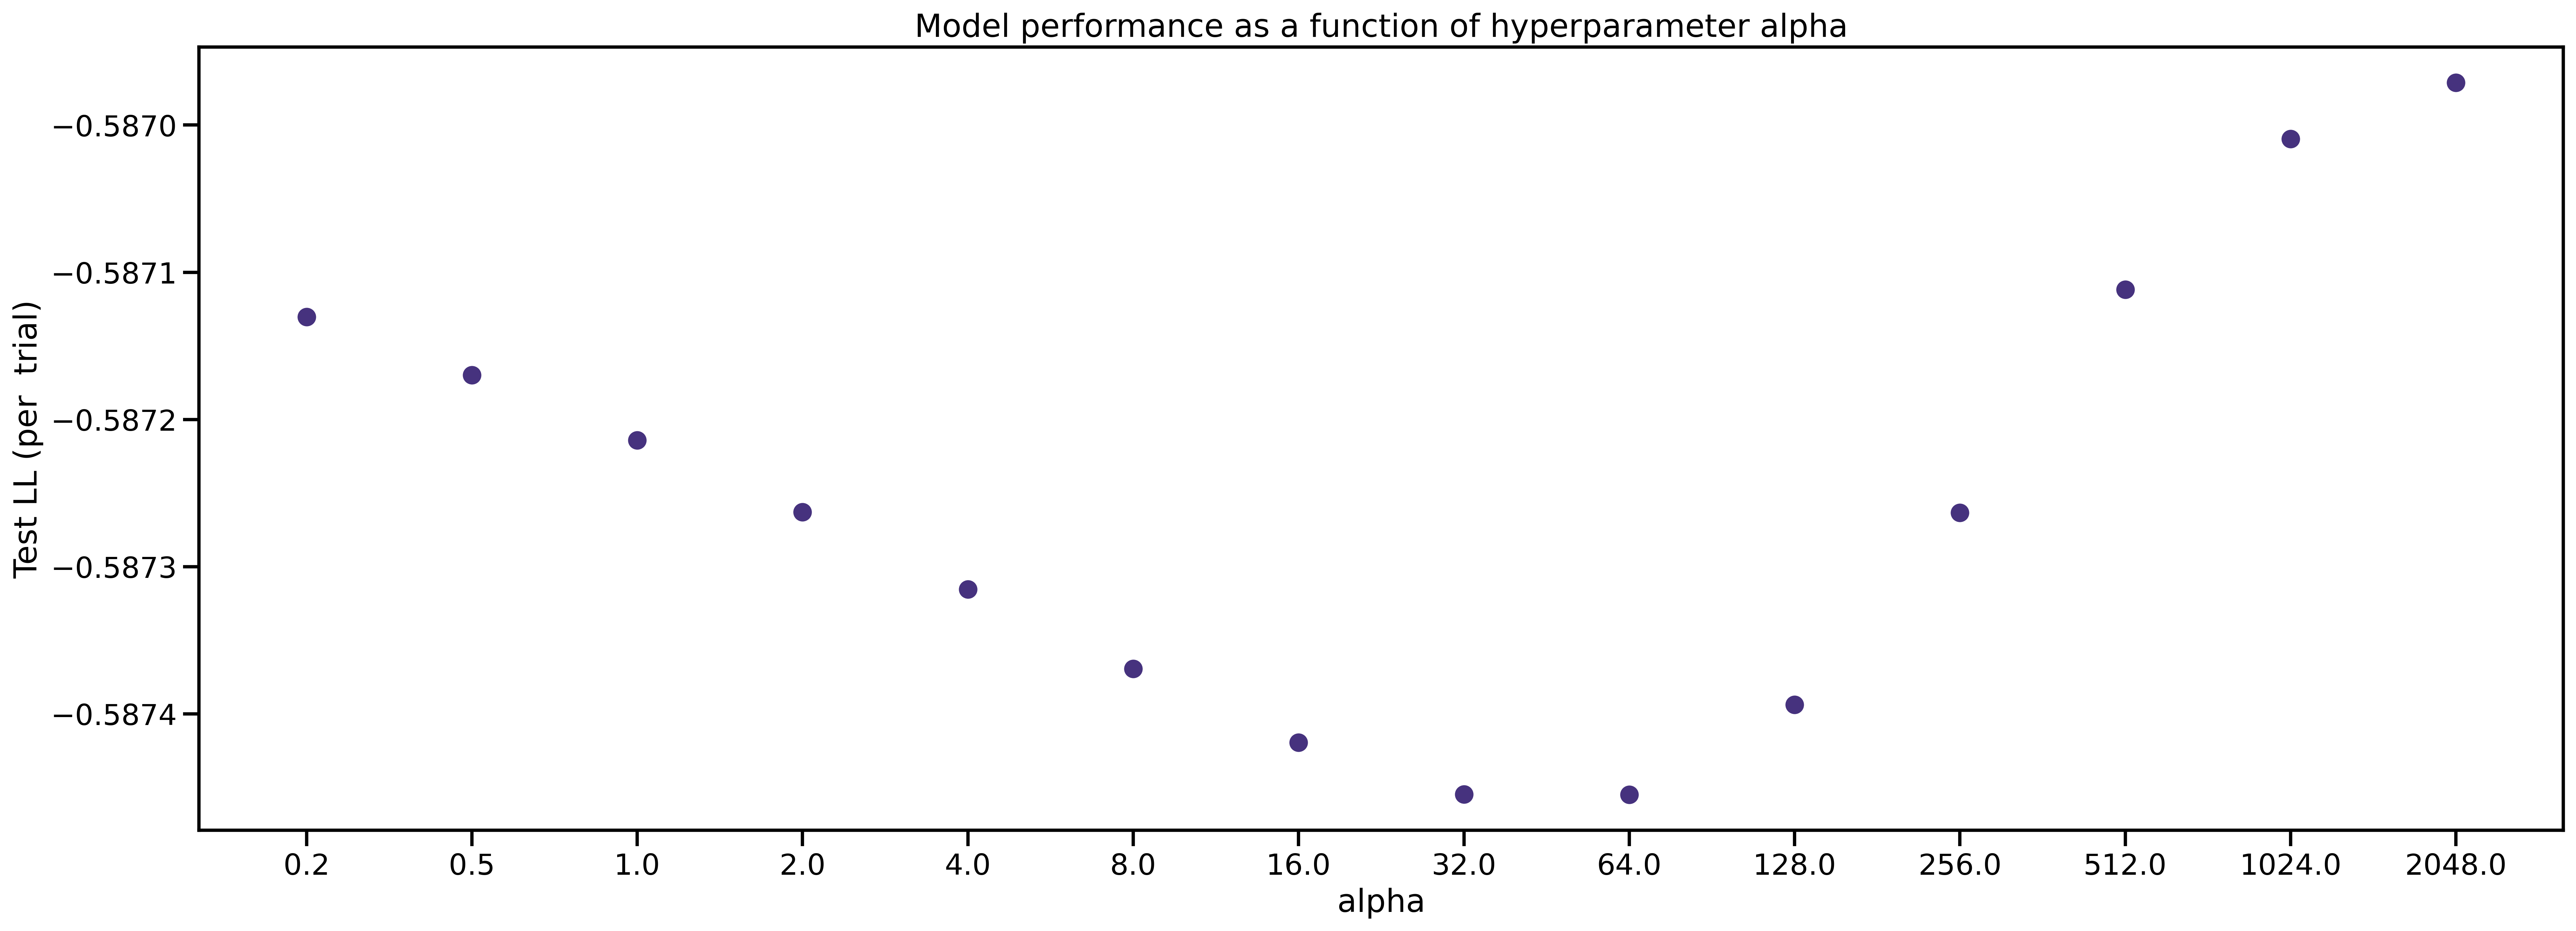

In [20]:
fig, axes = plt.subplots(1, figsize = (24,8), dpi=400)
colormap = sns.color_palette("viridis")
axes.scatter(np.log2(alphaList), testLl[:], color = colormap[0])
axes.set_xlabel('alpha')
axes.set_ylabel('Test LL (per  trial)')
# alphaListEven = [alphaList[ind] for ind in range(0,len(alphaList),2)]
# axes.set_xticks(np.log2(alphaListEven),[f'{np.round(alpha,1)}' for alpha in alphaListEven])
axes.set_xticks(np.log2(alphaList),[f'{np.round(alpha,1)}' for alpha in alphaList])
axes.set_title('Model performance as a function of hyperparameter alpha')
#fig.savefig(f'../figures/Alpha_vs_TestLl-version1.png', bbox_inches='tight', dpi=400)

Text(0.5, 0, 'alpha')

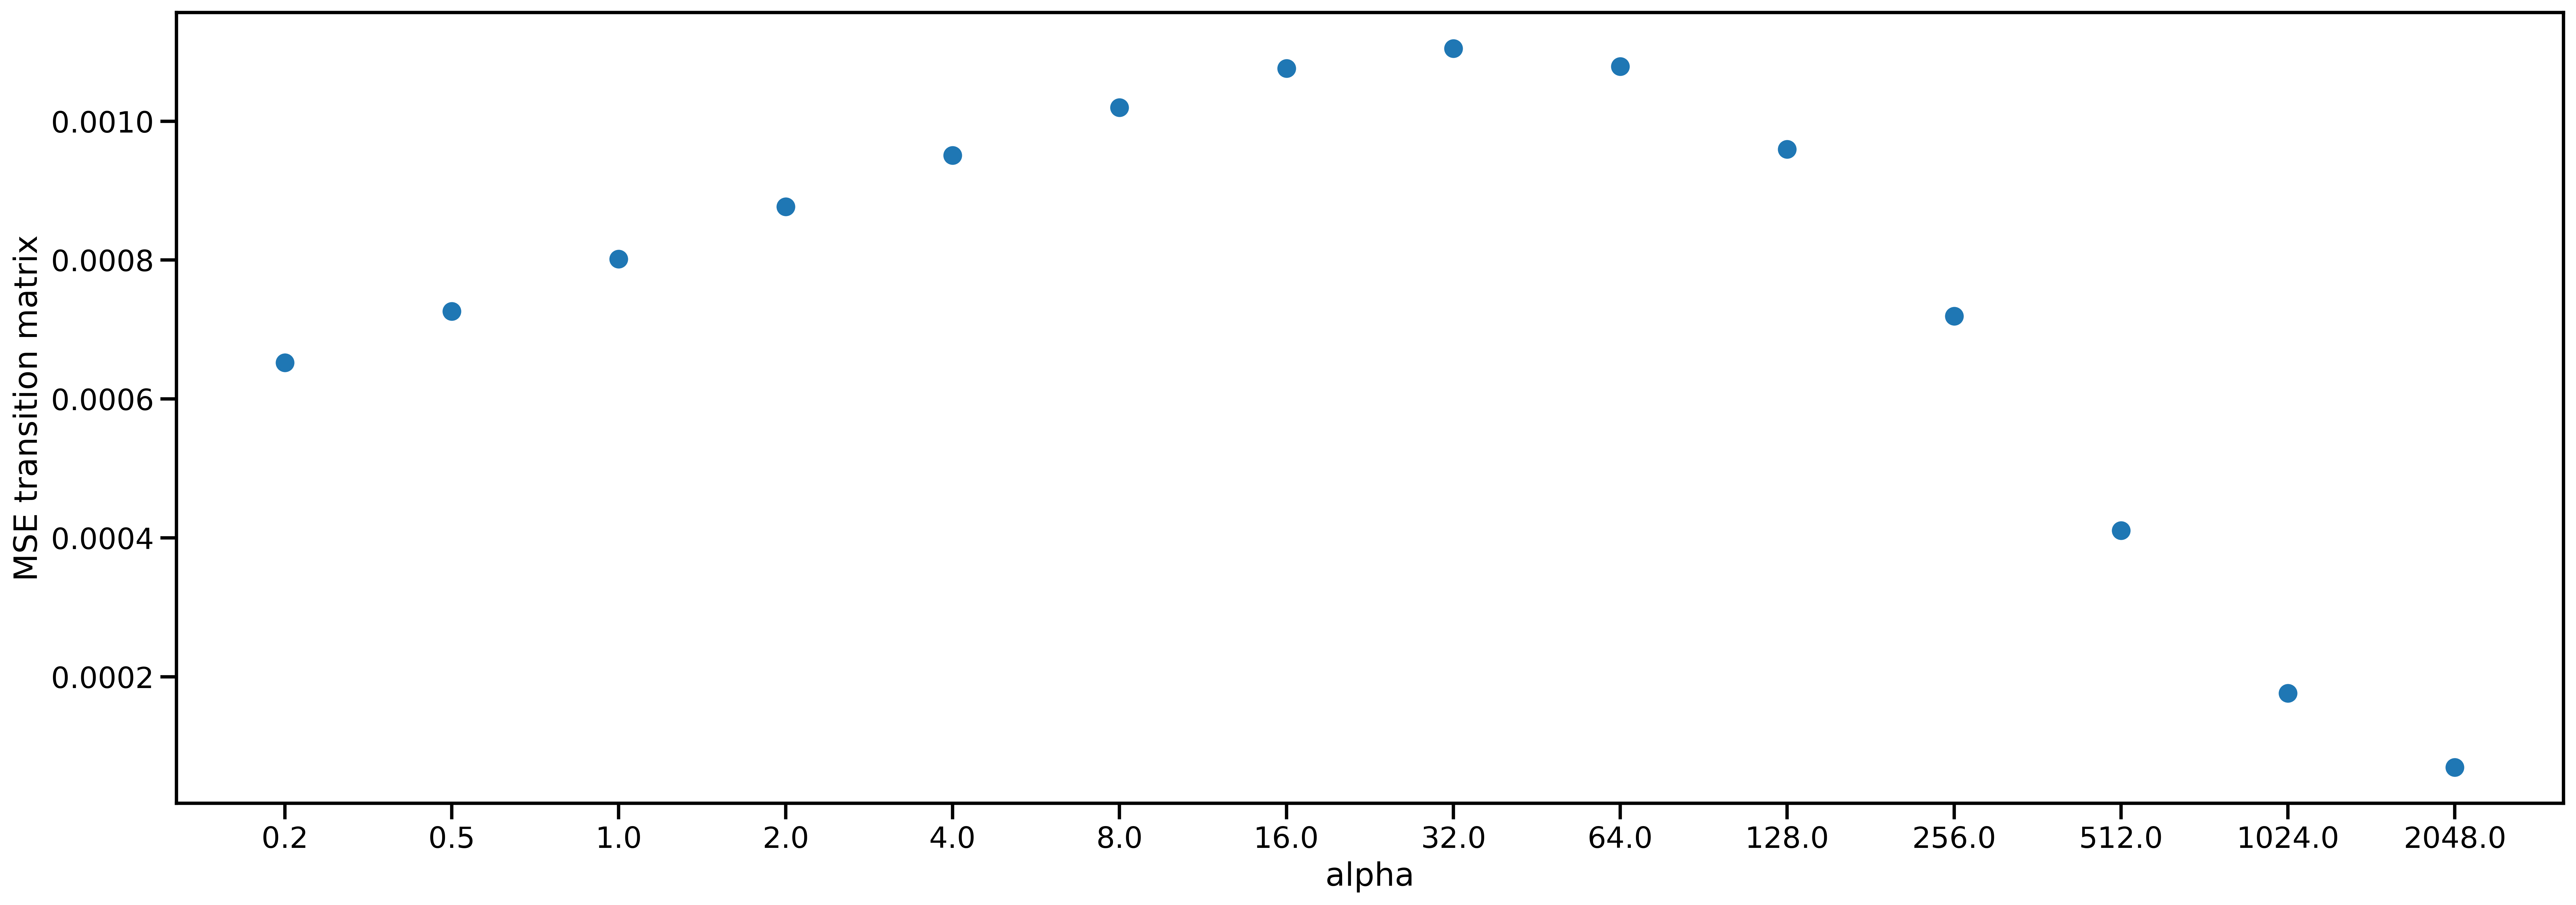

In [21]:
mseP = np.zeros((len(alphaList),len(sessInd)-1))
colormap = sns.color_palette("viridis")
fig, axes = plt.subplots(1, figsize = (24,8), dpi=400)
for indAlpha in range(0,len(alphaList)):
    for s in range(0,len(sessInd)-1):
        mseP[indAlpha,s] = ((allP[indAlpha,sessInd[s]] - trueP[sessInd[s]])**2).mean(axis=None)
axes.scatter(np.log2(alphaList),mseP.sum(axis=1))
axes.set_xticks(np.log2(alphaList),[f'{np.round(alpha,1)}' for alpha in alphaList])
axes.set_ylabel('MSE transition matrix')
axes.set_xlabel('alpha')

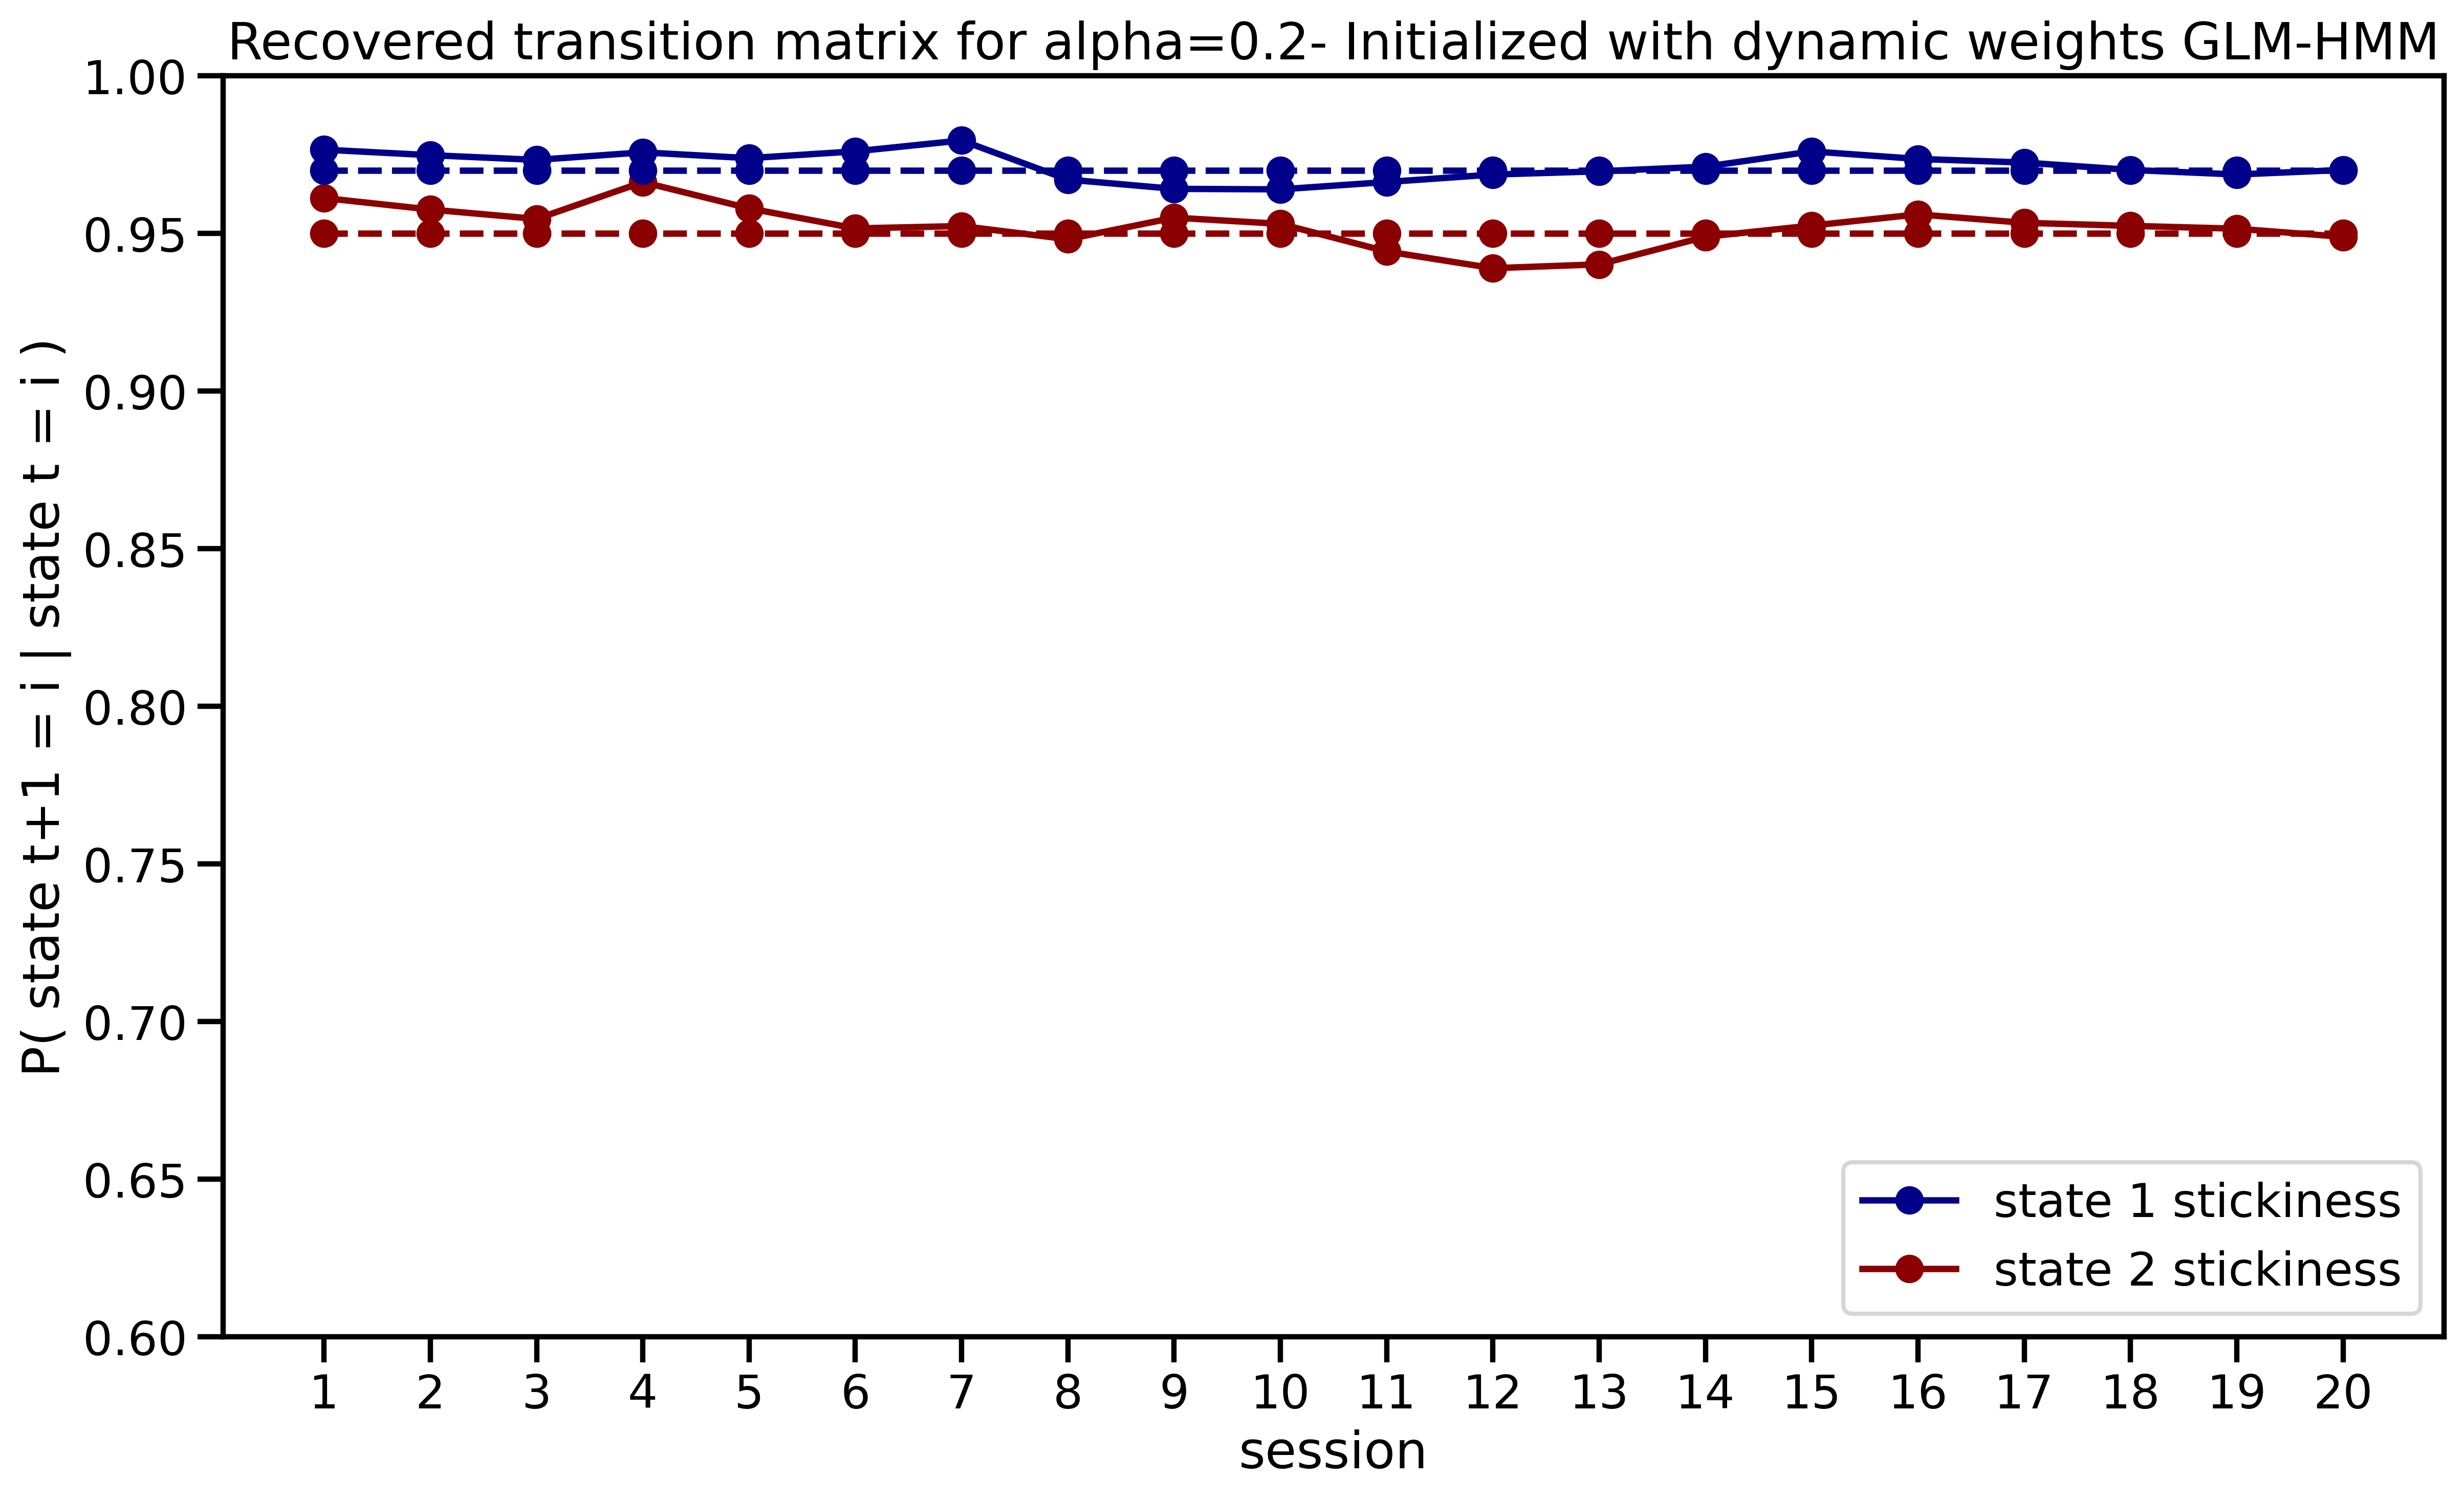

In [25]:
# CHECK FIT TRANSITION MATRIX AND WEIGHTS
for indAlpha in [0]: #range(5,len(alphaList)-3):
    # fig, axes = plt.subplots(1, figsize = (14,8), dpi=400)
    # plotting_weights(oldW[indAlpha], sessInd, axes=axes,  trueW=trueW, title=f'Recovered weights for alpha={np.round(alphaList[indAlpha],1)} - Initialized with dynamic weights GLM-HMM', save_fig=False)
    fig, axes = plt.subplots(1, figsize = (14,8), dpi=400)
    plotting_transition_matrix_stickiness(allP[indAlpha], sessInd, axes, trueP=trueP, title=f'Recovered transition matrix for alpha={np.round(alphaList[indAlpha],1)}- Initialized with dynamic weights GLM-HMM', save_fig=False)

### Linearly changing true transition matrix P

[[[0.8        0.2       ]
  [0.02       0.98      ]]

 [[0.80894737 0.19105263]
  [0.02526316 0.97473684]]

 [[0.81789474 0.18210526]
  [0.03052632 0.96947368]]

 [[0.82684211 0.17315789]
  [0.03578947 0.96421053]]

 [[0.83578947 0.16421053]
  [0.04105263 0.95894737]]

 [[0.84473684 0.15526316]
  [0.04631579 0.95368421]]

 [[0.85368421 0.14631579]
  [0.05157895 0.94842105]]

 [[0.86263158 0.13736842]
  [0.05684211 0.94315789]]

 [[0.87157895 0.12842105]
  [0.06210526 0.93789474]]

 [[0.88052632 0.11947368]
  [0.06736842 0.93263158]]

 [[0.88947368 0.11052632]
  [0.07263158 0.92736842]]

 [[0.89842105 0.10157895]
  [0.07789474 0.92210526]]

 [[0.90736842 0.09263158]
  [0.08315789 0.91684211]]

 [[0.91631579 0.08368421]
  [0.08842105 0.91157895]]

 [[0.92526316 0.07473684]
  [0.09368421 0.90631579]]

 [[0.93421053 0.06578947]
  [0.09894737 0.90105263]]

 [[0.94315789 0.05684211]
  [0.10421053 0.89578947]]

 [[0.95210526 0.04789474]
  [0.10947368 0.89052632]]

 [[0.96105263 0.03894737]
  

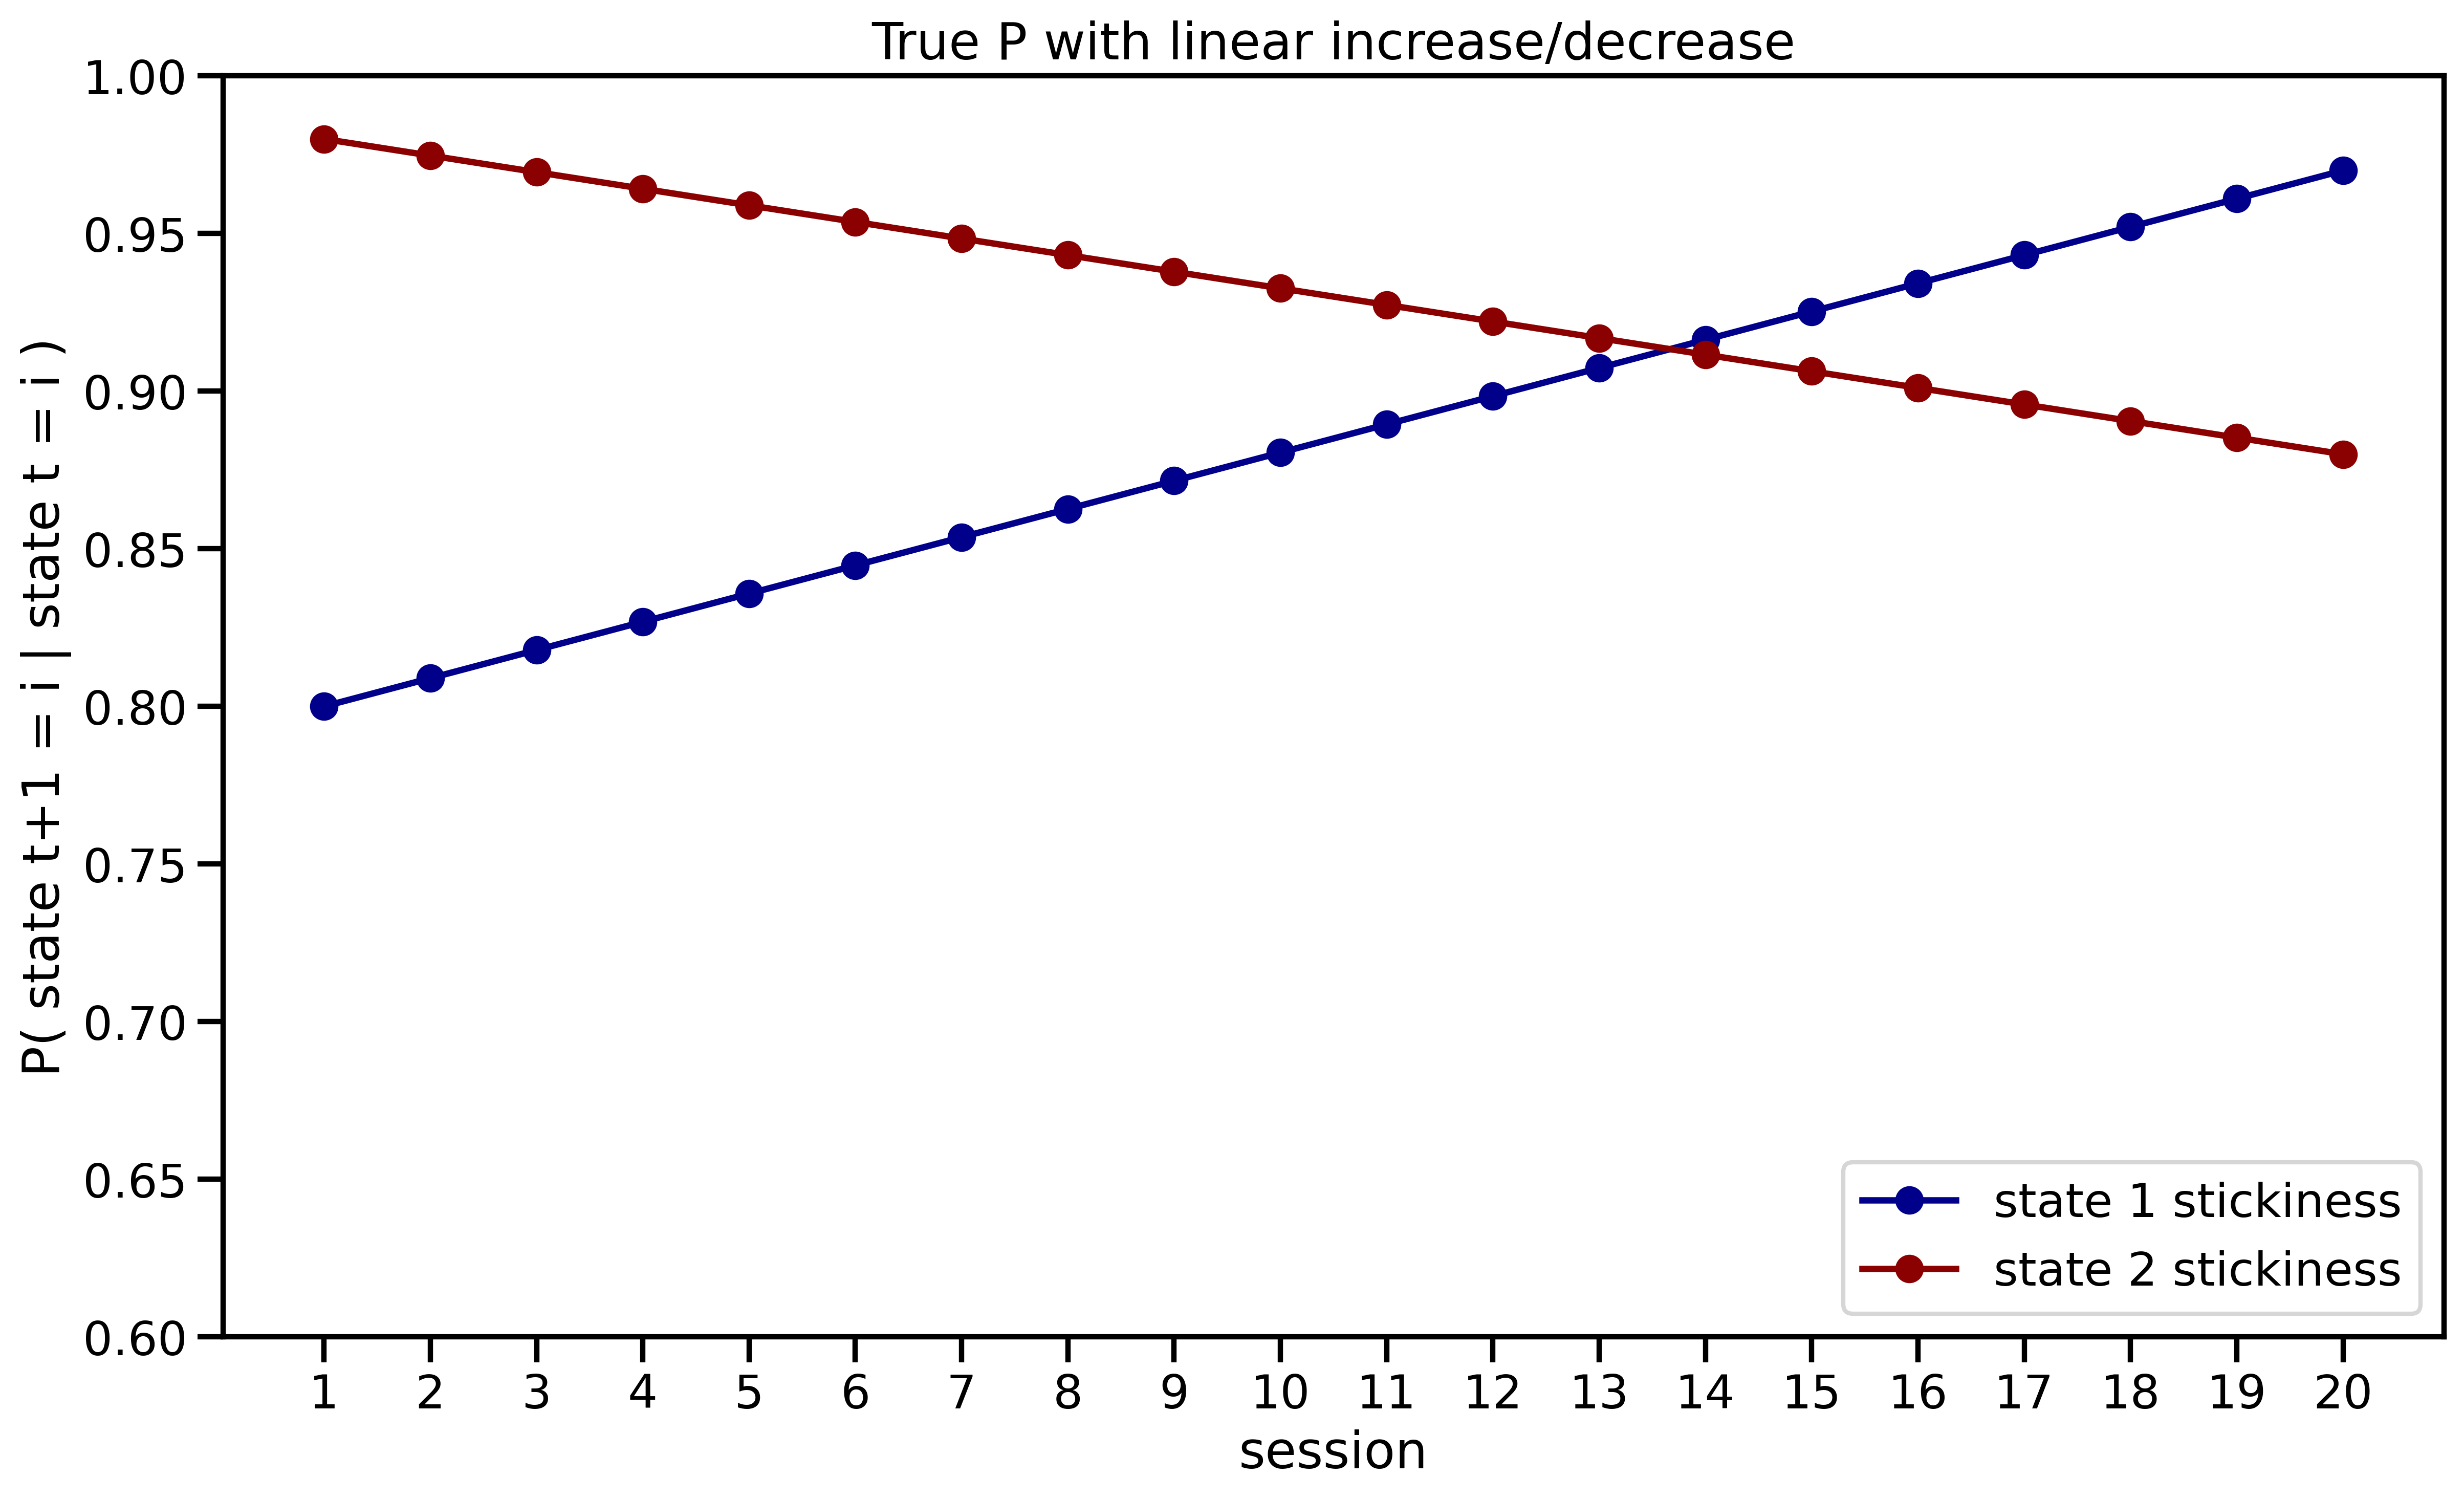

In [4]:
ourP = np.zeros((S,K,K))
ourP[:,0,0] = np.linspace(0.8,0.97,S) # state 1 sensory (increasing)
ourP[:,1,1] = np.linspace(0.98,0.88,S) # state 1 bias (decreasing)
ourP[:,0,1] = 1 - ourP[:,0,0]
ourP[:,1,0] = 1 - ourP[:,1,1]

print(ourP)
trueP = np.zeros((N,K,K))
for sess in range(0,S):
    for t in range(0,T):
        trueP[sess*T+t] = ourP[sess]

fig, axes = plt.subplots(1, figsize = (14,8), dpi=400)
plotting_transition_matrix_stickiness(trueP, sessInd, axes, trueP=None, title=f'True P with linear increase/decrease', save_fig=False)


In [5]:
# SIMULATE DATA FOR SESSION-VARYING TRUE P
dGLMHMM1 = dglm_hmm1.dGLM_HMM1(N,K,D,C)
dGLMHMM = dglm_hmm2.dGLM_HMM2(N,K,D,C)
# _, _, _ = dGLMHMM.simulate_data(trueW, trueP, sessInd, save=True, title=f'N={N}_{K}_state_linearP_train', pi0=0.5)
# _, _, _ = dGLMHMM.simulate_data(trueW, trueP, sessInd, save=True, title=f'N={N}_{K}_state_linearP_test', pi0=0.5)
trainX = np.load(f'../data/N={N}_{K}_state_linearP_trainX.npy')
trainY = np.load(f'../data/N={N}_{K}_state_linearP_trainY.npy')
testX = np.load(f'../data/N={N}_{K}_state_linearP_testX.npy')
testY = np.load(f'../data/N={N}_{K}_state_linearP_testY.npy')

# Check GLOBAL P by fitting dGLM-HMM1 & FIT WITH TRUE ALPHA AND CHECK THAT
# oneSessInd = [0,N]
# initP0, initW0 = dGLMHMM1.generate_param(sessInd=oneSessInd, transitionDistribution=['dirichlet', (5, 1)], weightDistribution=['uniform', (-2,2)]) # initial random param
# initP,  initW, _ = dGLMHMM1.fit(trainX, trainY,  initP0, initW0, sigma=reshapeSigma(1, K, D), sessInd=oneSessInd, pi0=None, maxIter=300, tol=1e-4) # GLM-HMM param # sigma does not matter
# checkP0,  checkW0, _ = dGLMHMM1.fit(trainX, trainY,  initP, initW, sigma=reshapeSigma(0.2, K, D), sessInd=sessInd, pi0=None, maxIter=300, tol=1e-4) # dGLM-HMM1 
# checkP, checkW, checkLl = dGLMHMM.fit(trainX, trainY,  initP=reshapeP_M1_to_M2(checkP0, N), initW=checkW0, sigma=reshapeSigma(0.2, K, D), alpha=alpha, globalP=checkP0, sessInd=sessInd, pi0=None, maxIter=600, tol=1e-3) # fit the model

In [7]:
# Fitting for different values of alpha
alphaList = [4**x for x in list(np.arange(-2,2, dtype=float))] + [4**x for x in list(np.arange(2,5,0.5, dtype=float))] + [4**x for x in list(np.arange(5,8,1, dtype=float))]
maxiter=600
allLl = np.zeros((len(alphaList),maxiter))
allP = np.zeros((len(alphaList),N,K,K))
allW = np.zeros((len(alphaList),N,K,D,C))
testLl = np.zeros((len(alphaList)))

oneSessInd = [0,N] # treating whole dataset as one session for normal GLM-HMM fitting
initP0, initW0 = dGLMHMM1.generate_param(sessInd=oneSessInd, transitionDistribution=['dirichlet', (5, 1)], weightDistribution=['uniform', (-2,2)]) # initial random param
initP,  initW, _ = dGLMHMM1.fit(trainX, trainY,  initP0, initW0, sigma=reshapeSigma(1, K, D), sessInd=oneSessInd, pi0=None, maxIter=maxiter, tol=1e-4) # GLM-HMM param # sigma does not matter
checkP0,  checkW0, _ = dGLMHMM1.fit(trainX, trainY,  initP, initW, sigma=reshapeSigma(0.2, K, D), sessInd=sessInd, pi0=None, maxIter=maxiter, tol=1e-4) # dGLM-HMM1 

globalP = trueP.mean(axis=0)
print("Global P ", globalP)
    
for indAlpha in range(0,len(alphaList)): 
   print(f'indAlpha {indAlpha}')

   if (indAlpha == 0):
      # fit
      allP[indAlpha],allW[indAlpha], allLl[indAlpha] = dGLMHMM.fit(trainX, trainY,  initP=reshapeP_M1_to_M2(checkP0, N), initW=checkW0, sigma=reshapeSigma(0.2, K, D), alpha=alphaList[indAlpha], globalP=globalP, sessInd=sessInd, pi0=None, maxIter=maxiter, tol=1e-3) # fit the model
   else:
      allP[indAlpha],allW[indAlpha], allLl[indAlpha] = dGLMHMM.fit(trainX, trainY,  initP=allP[indAlpha-1], initW=checkW0, sigma=reshapeSigma(0.2, K, D), alpha=alphaList[indAlpha], globalP=globalP, sessInd=sessInd, pi0=None, maxIter=maxiter, tol=1e-3) # fit the model
   

   # evaluate
   testPhi = dGLMHMM.observation_probability(testX, reshapeWeights(allW[indAlpha], sessInd, testSessInd))
   for s in range(0, S):
      _, _, temp = dGLMHMM.forward_pass(testY[testSessInd[s]:testSessInd[s+1]],allP[indAlpha],testPhi[testSessInd[s]:testSessInd[s+1]])
      testLl[indAlpha] += temp
   
testLl = testLl / testSessInd[-1] # normalizing to the total number of trials in test
    
np.save(f'../data/Ll_N={N}_{K}_state_linearP', allLl)
np.save(f'../data/P_N={N}_{K}_state_linearP', allP)
np.save(f'../data/W_N={N}_{K}_state_linearP', allW)
np.save(f'../data/testLl_N={N}_{K}_state_linearP', testLl)

0
10
20
30
40
50
60
70
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
Global P  [[0.885 0.115]
 [0.07  0.93 ]]
indAlpha 0
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590


ValueError: operands could not be broadcast together with shapes (100000,2) (500000,2) 

In [6]:
oneSessInd = [0,N] # treating whole dataset as one session for normal GLM-HMM fitting
globalP = trueP.mean(axis=0)
print("Global P ", globalP)
maxiter=300
initP0, initW0 = dGLMHMM1.generate_param(sessInd=oneSessInd, transitionDistribution=['dirichlet', (5, 1)], weightDistribution=['uniform', (-2,2)]) # initial random param
initP,  initW, _ = dGLMHMM1.fit(trainX, trainY,  initP0, initW0, sigma=reshapeSigma(1, K, D), sessInd=oneSessInd, pi0=None, maxIter=maxiter, tol=1e-4) # GLM-HMM param # sigma does not matter
checkP0,  checkW0, _ = dGLMHMM1.fit(trainX, trainY,  initP, initW, sigma=reshapeSigma(0.2, K, D), sessInd=sessInd, pi0=None, maxIter=maxiter, tol=1e-4) # dGLM-HMM1 
mleP, mleW, mleLl = dGLMHMM.fit(trainX, trainY,  initP=reshapeP_M1_to_M2(checkP0, N), initW=checkW0, sigma=reshapeSigma(0.2, K, D), alpha=0, globalP=globalP, sessInd=sessInd, pi0=None, maxIter=1000, tol=1e-3) # fit the model
   

Global P  [[0.885 0.115]
 [0.07  0.93 ]]
0
10
20
30
40
50
60
70
80
90
100
0
10
20
30
40
50
60
70
80


In [9]:
print(allP[0])

[[[0.94596644 0.05403356]
  [0.11440519 0.88559481]]

 [[0.94596644 0.05403356]
  [0.11440519 0.88559481]]

 [[0.94596644 0.05403356]
  [0.11440519 0.88559481]]

 ...

 [[0.97025572 0.02974428]
  [0.10931075 0.89068925]]

 [[0.97025572 0.02974428]
  [0.10931075 0.89068925]]

 [[0.97025572 0.02974428]
  [0.10931075 0.89068925]]]


Text(0.5, 1.0, 'Model performance as a function of hyperparameter alpha')

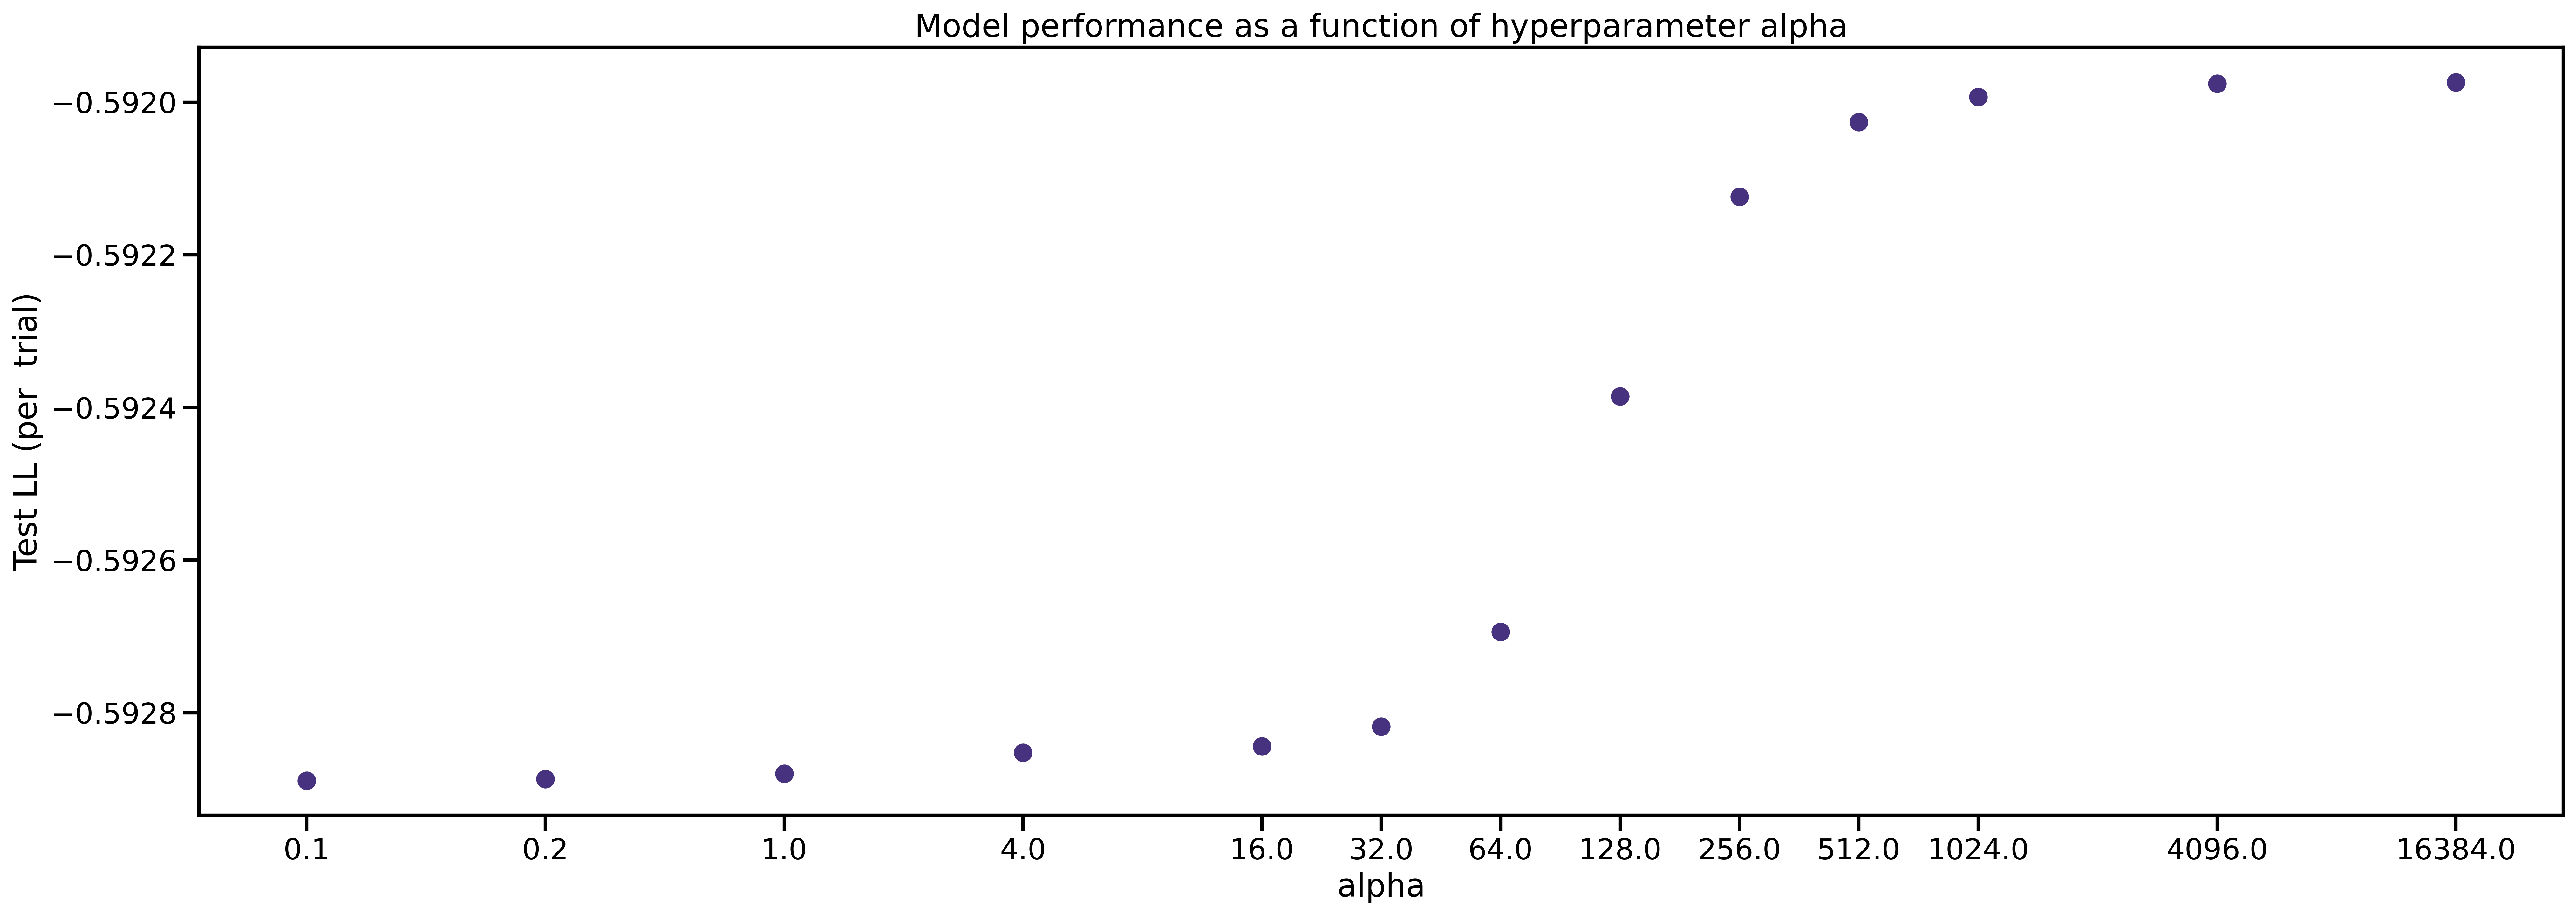

In [48]:
fig, axes = plt.subplots(1, figsize = (24,8), dpi=400)
colormap = sns.color_palette("viridis")
axes.scatter(np.log2(alphaList), testLl[:], color = colormap[0])
axes.set_xlabel('alpha')
axes.set_ylabel('Test LL (per  trial)')
# alphaListEven = [alphaList[ind] for ind in range(0,len(alphaList),2)]
# axes.set_xticks(np.log2(alphaListEven),[f'{np.round(alpha,1)}' for alpha in alphaListEven])
axes.set_xticks(np.log2(alphaList),[f'{np.round(alpha,1)}' for alpha in alphaList])
axes.set_title('Model performance as a function of hyperparameter alpha')
#fig.savefig(f'../figures/Alpha_vs_TestLl-version1.png', bbox_inches='tight', dpi=400)

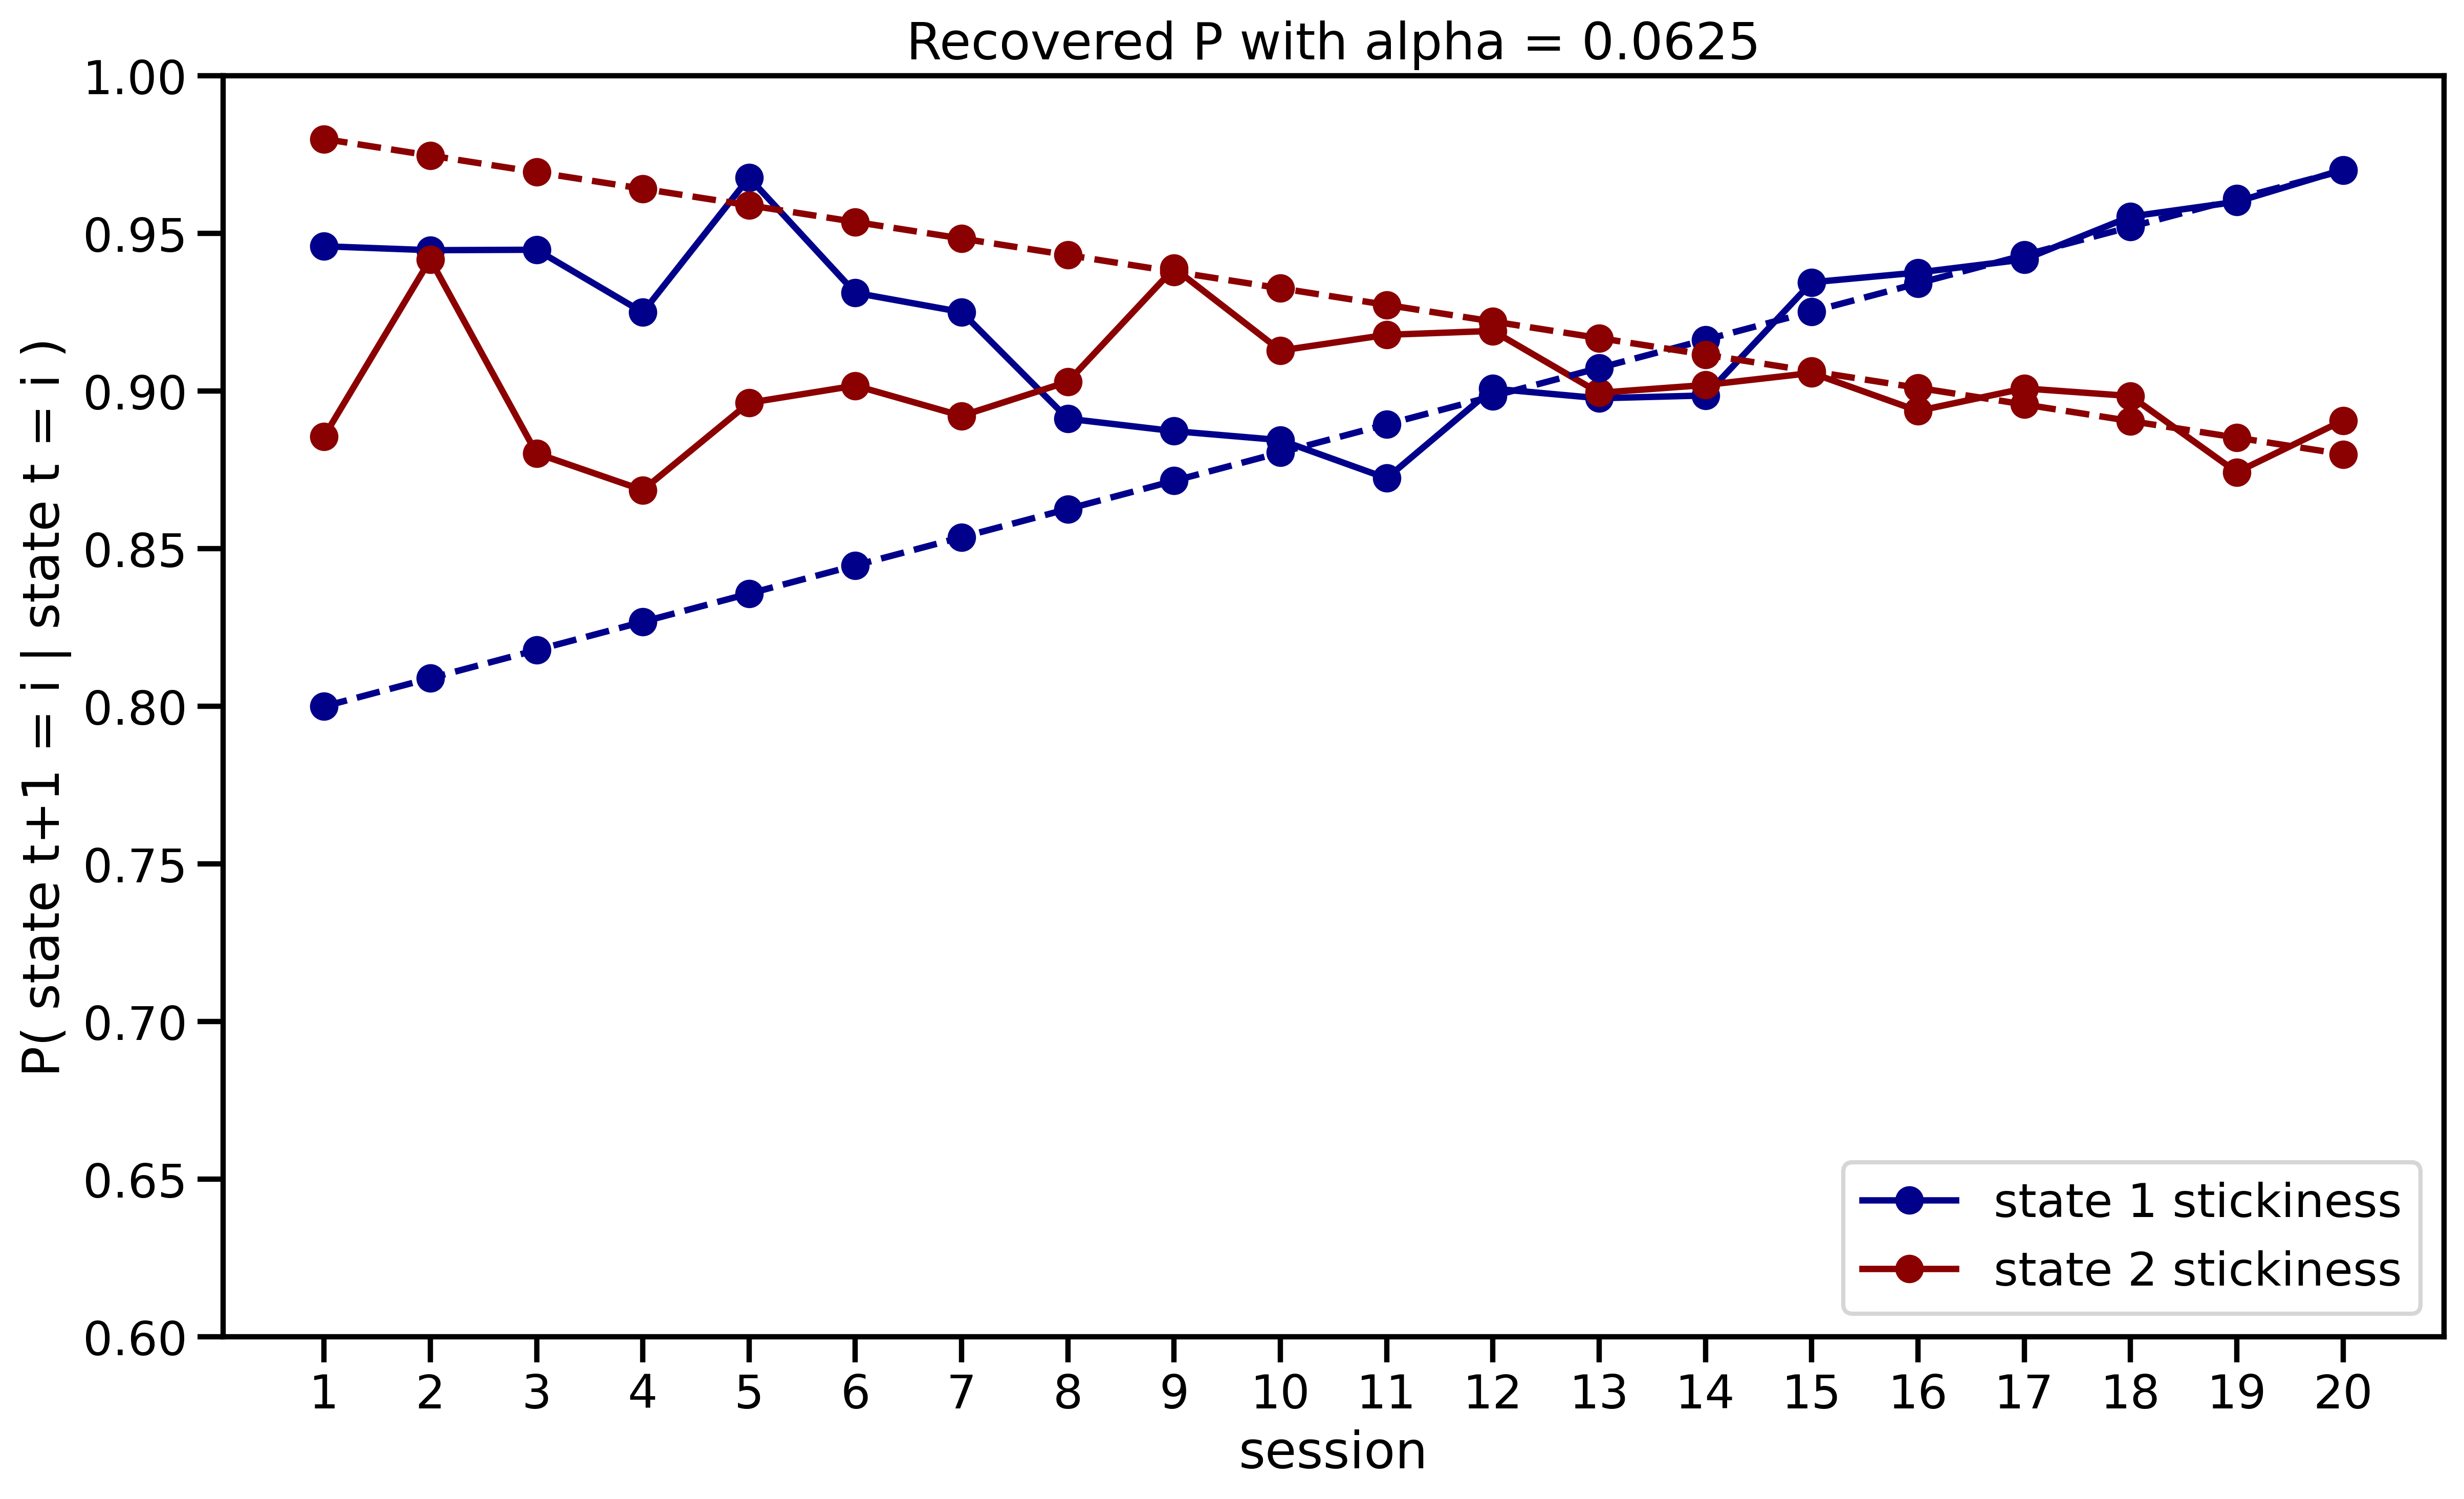

In [11]:
fig, axes = plt.subplots(1, figsize = (14,8), dpi=400)
plotting_transition_matrix_stickiness(allP[0], sessInd, axes, trueP=trueP, title=f'Recovered P with alpha = {alphaList[0]}', save_fig=False)

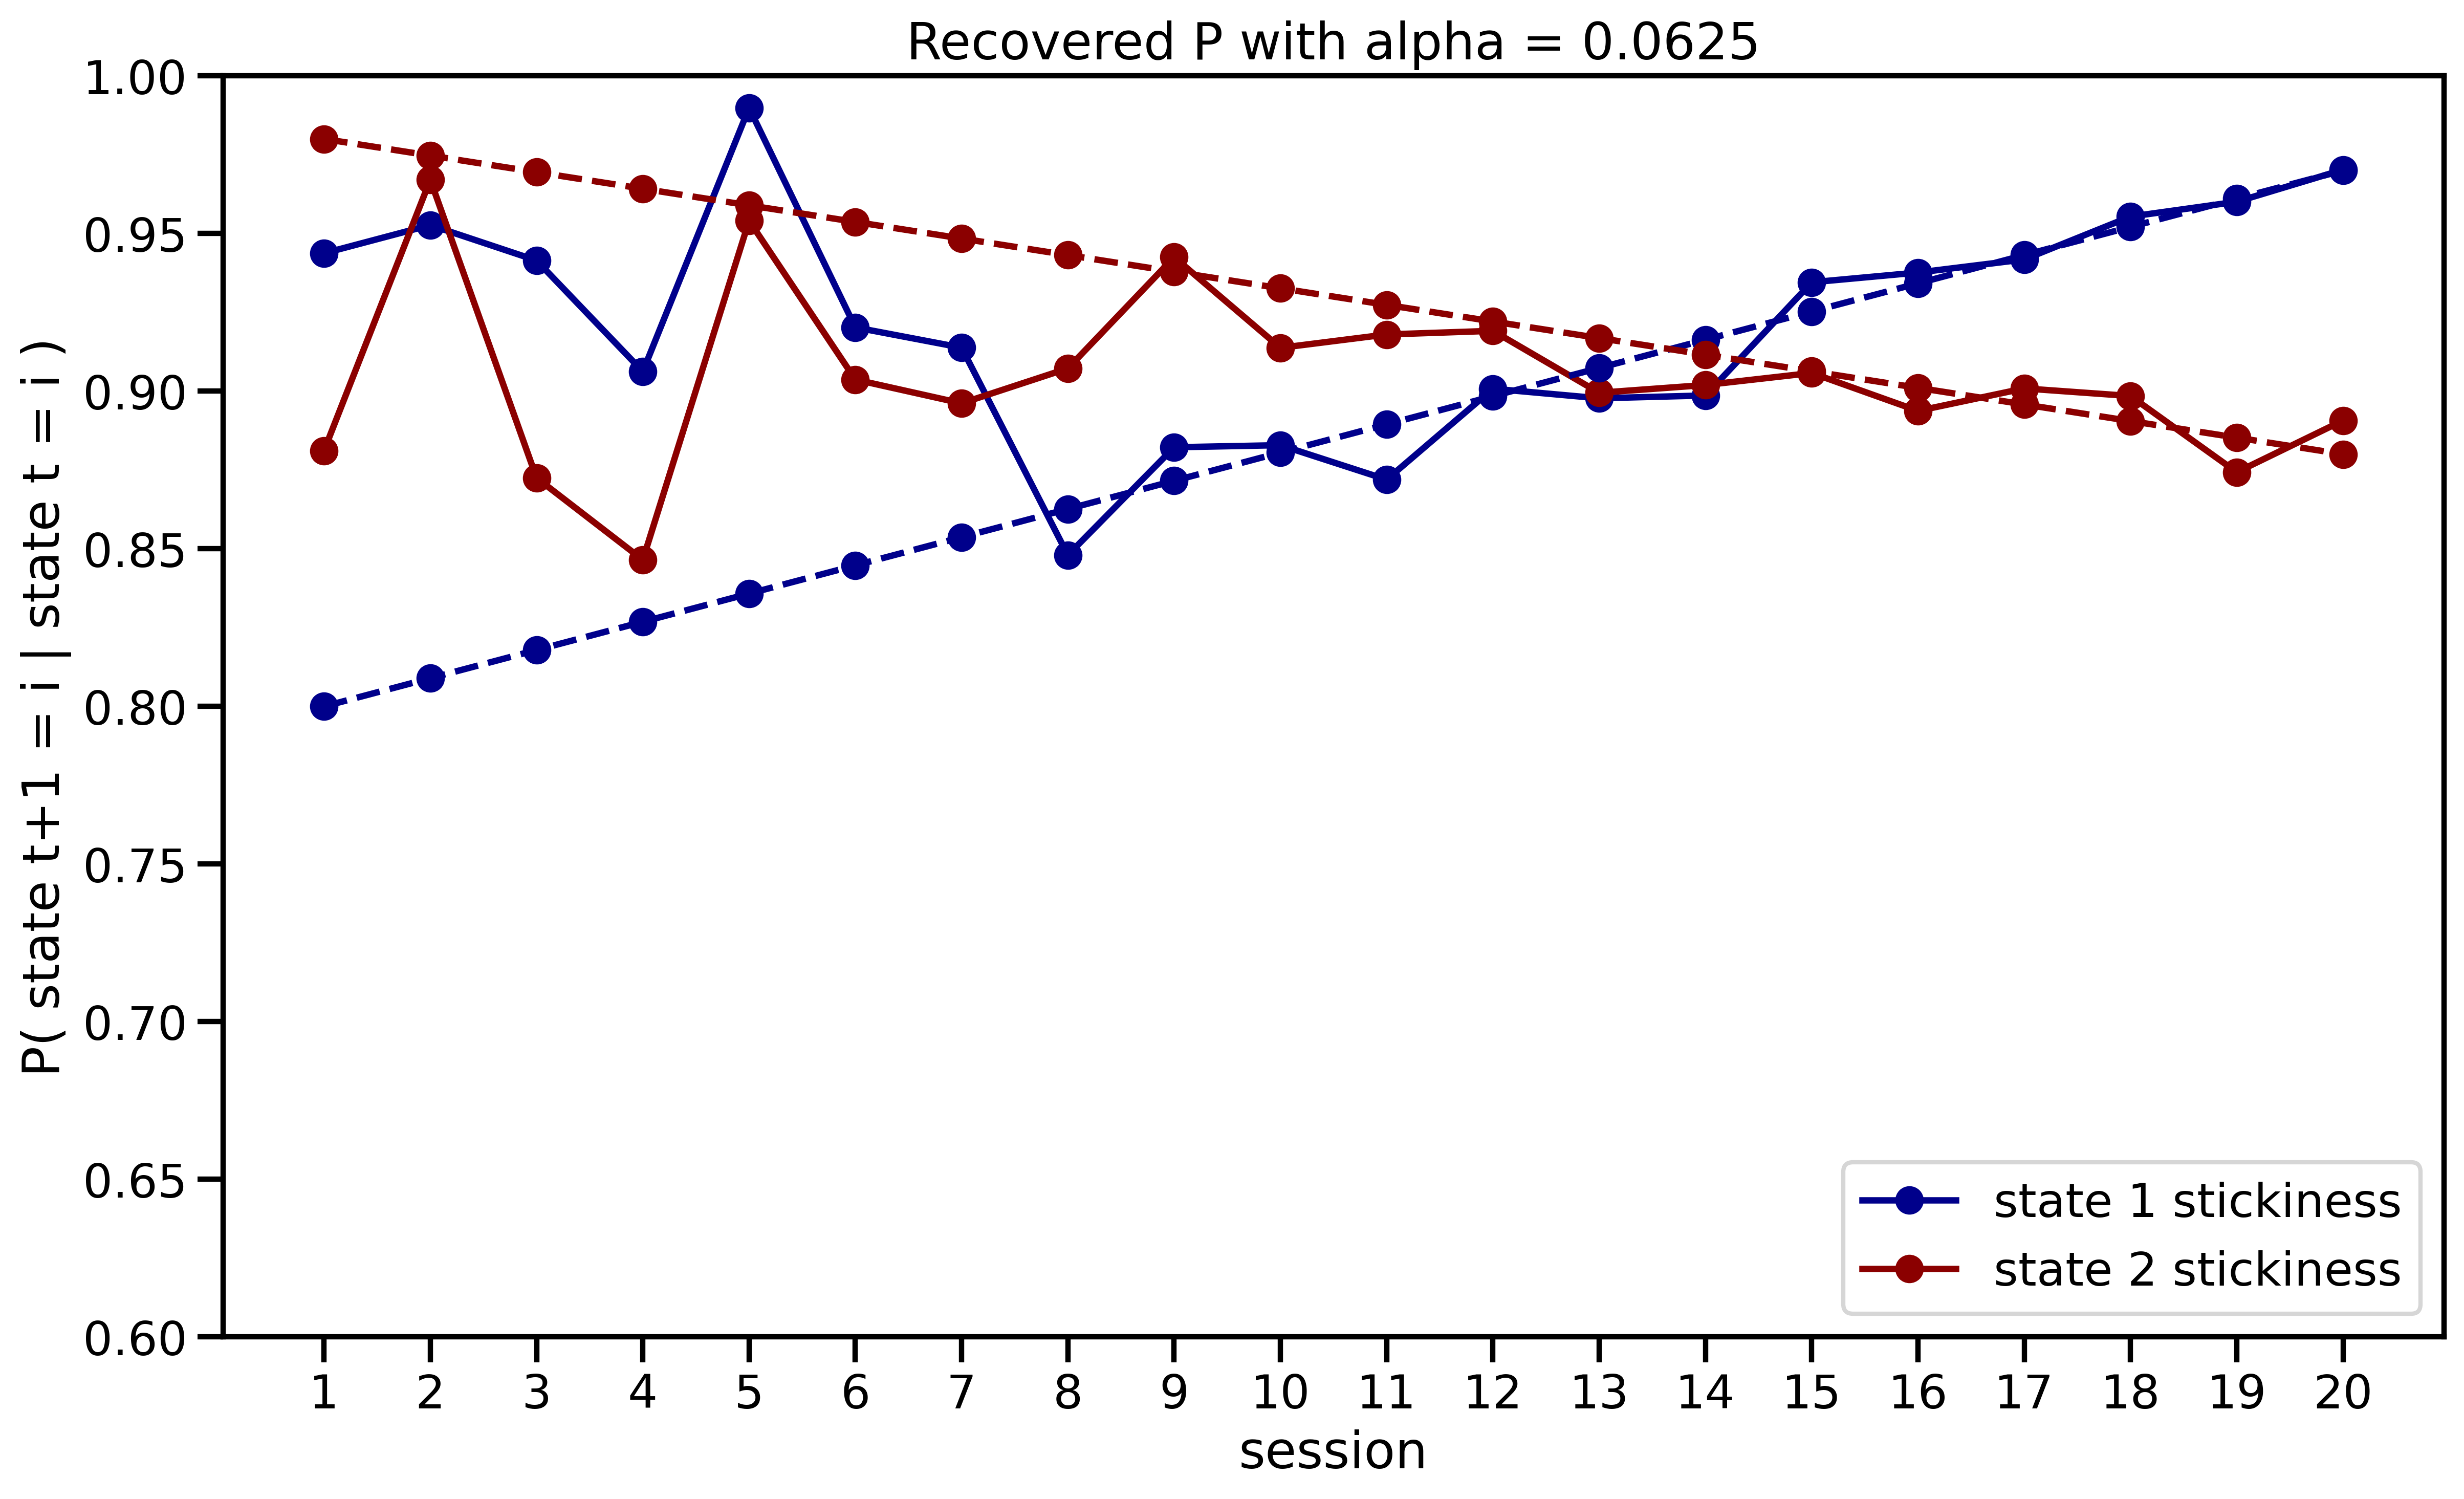

In [14]:
fig, axes = plt.subplots(1, figsize = (14,8), dpi=400)
plotting_transition_matrix_stickiness(mleP, sessInd, axes, trueP=trueP, title=f'Recovered P with alpha = {alphaList[0]}', save_fig=False)

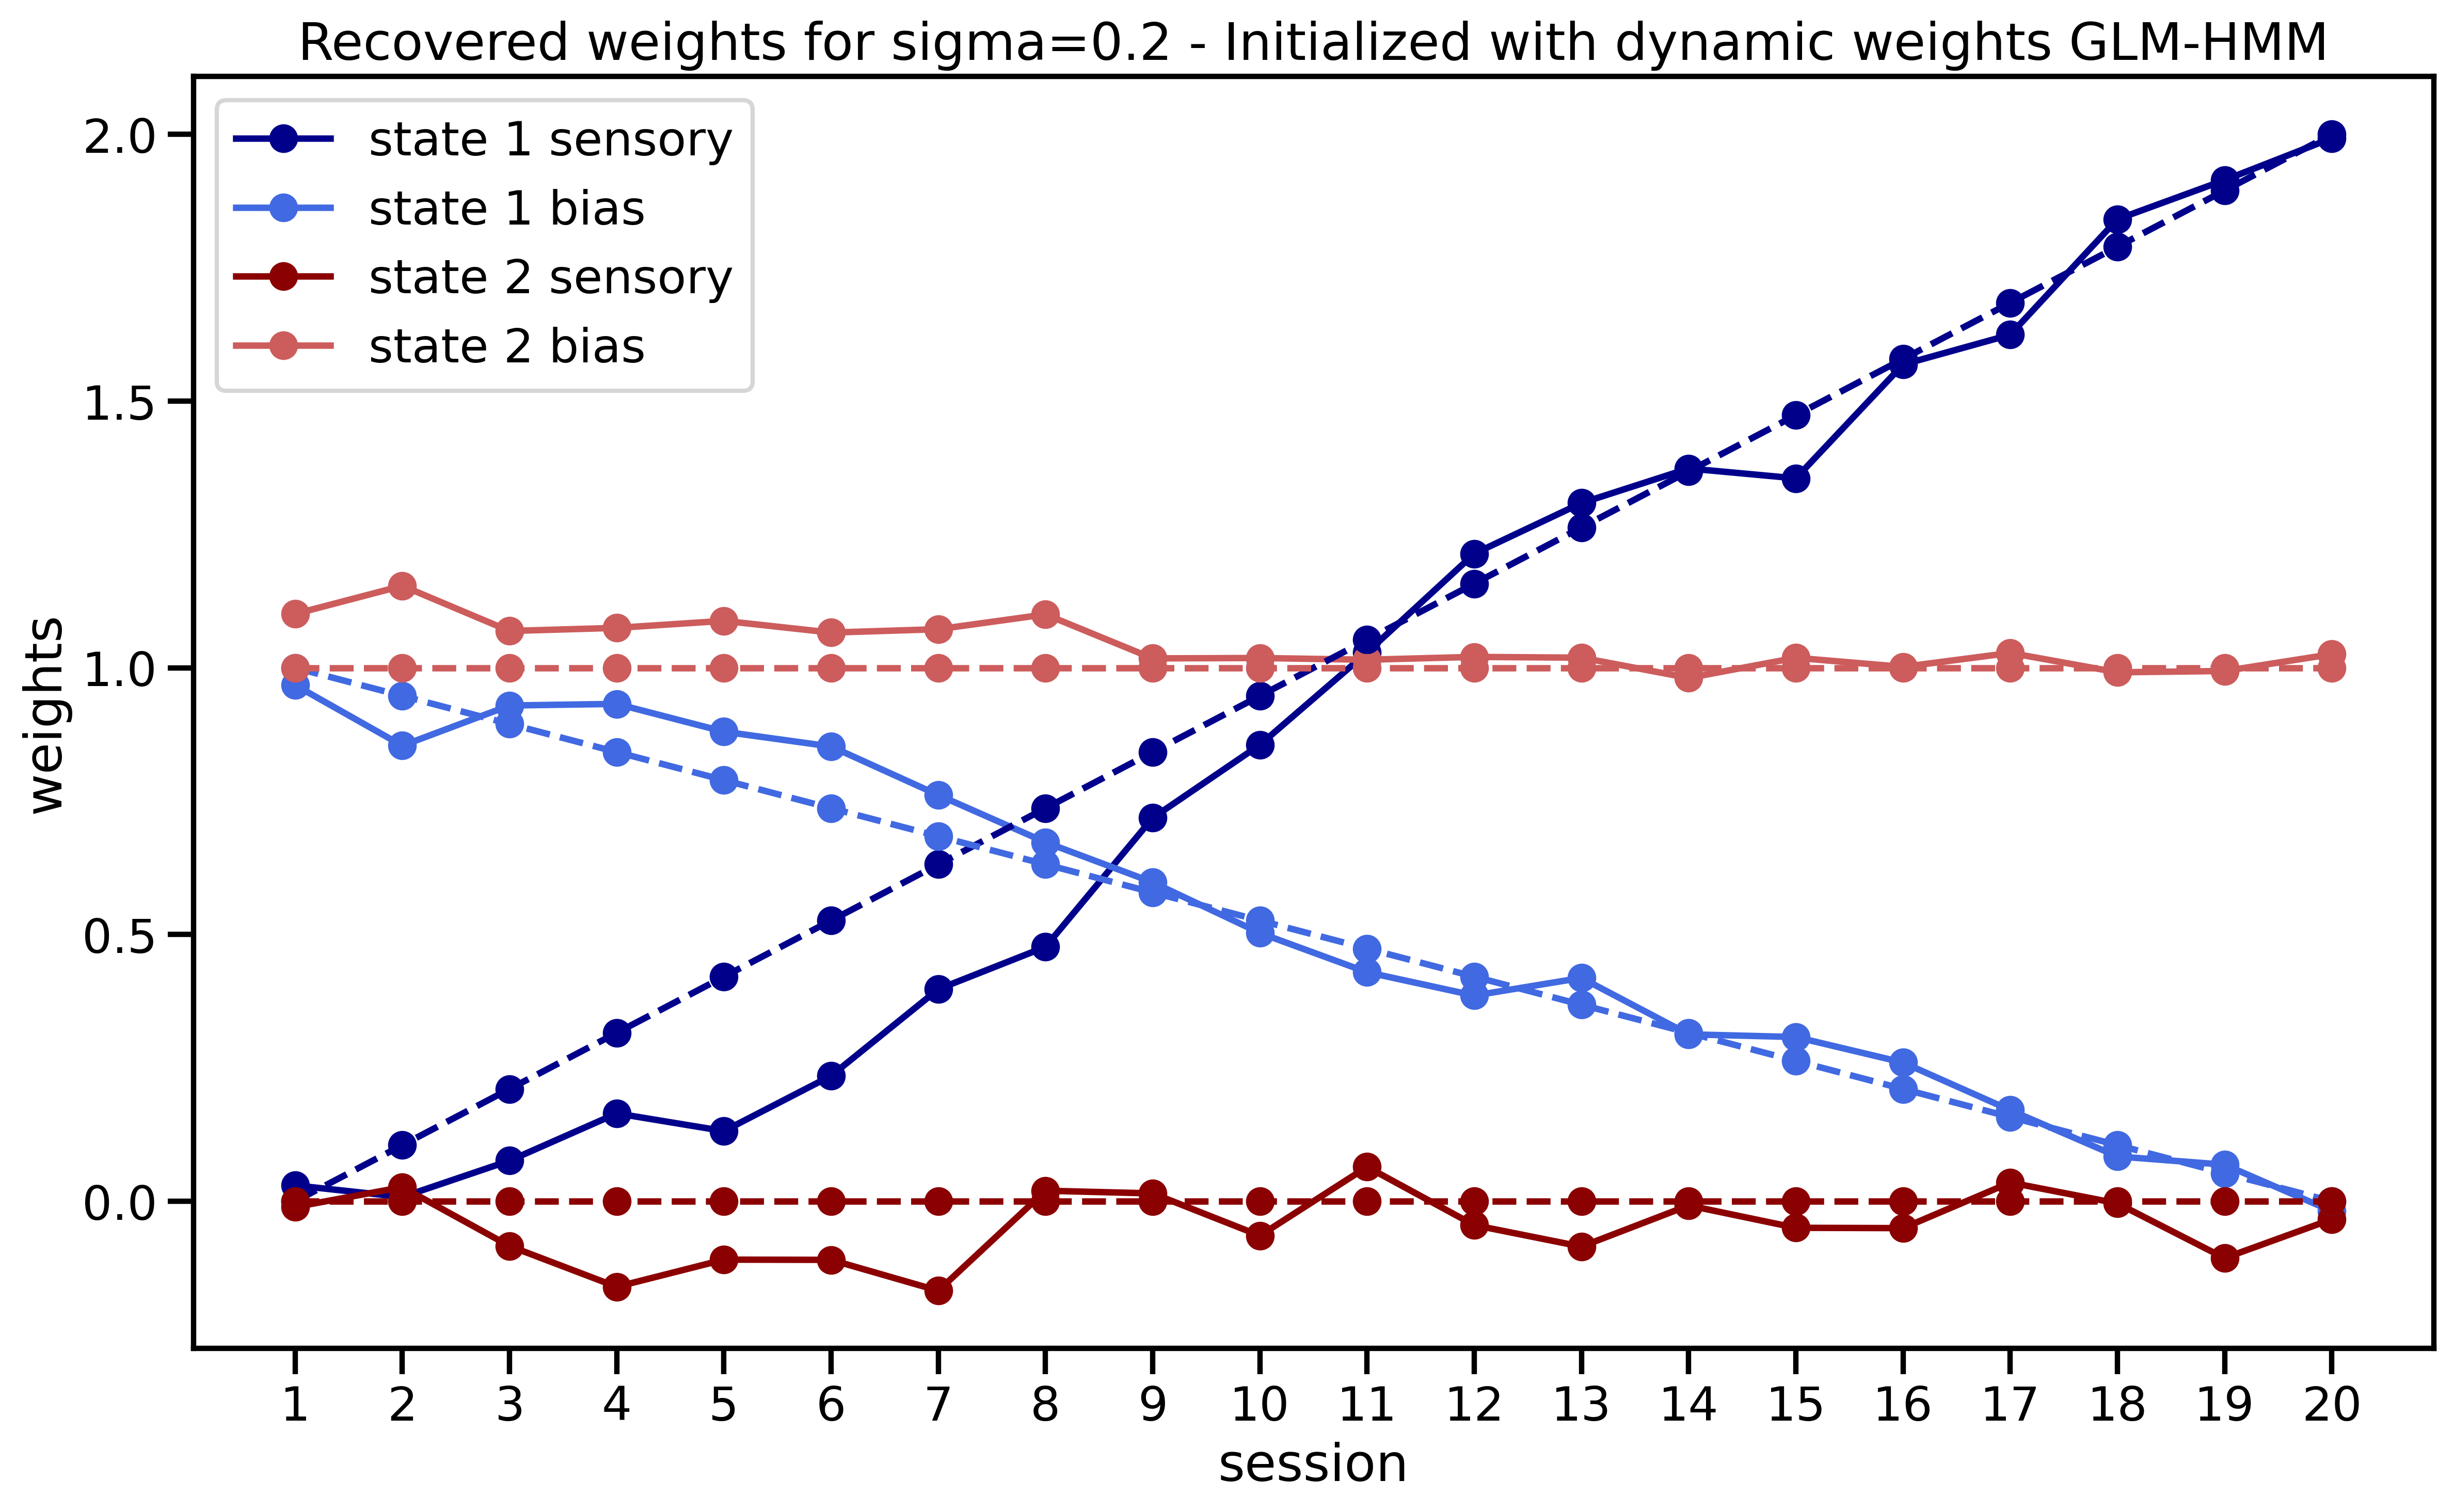

In [15]:
fig, axes = plt.subplots(1, figsize = (14,8), dpi=400)
plotting_weights(allW[0], sessInd, axes=axes,  trueW=trueW, title=f'Recovered weights for sigma=0.2 - Initialized with dynamic weights GLM-HMM', save_fig=False)